# Predicción de valores de sensores según la temperatura
## Proyecto: Mendéz Alvaro


## Creación de Entorno de Trabajo

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from datetime import datetime, timedelta

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

# Funciones Adicionales para preproceso de datos

In [2]:
## Función para convertir la fecha de Excel almacenada en los archivos de Mendez Alvaro en una fecha de Python

def excel_serial_date_to_datetime(serial_date):
    # Ajusta el desplazamiento de fecha entre Excel y Python (Excel cuenta desde 1900 y Python desde 1900-01-01)
    excel_epoch = datetime(1899, 12, 30)
    times = []
    
    for date in serial_date:
        ## Incluye el ajuste de 1900 años que tienen los archivos de Mendez Alvaro en la fecha
        date = excel_epoch + timedelta(days=date) - timedelta(days = 693960)
        day = date.strftime("%d.%m.%Y %H:%M:%S")
        times.append(day)
    
    return times


In [3]:
## Función creada para cargar una lista de directorios con los archivos csv que tienen el resumen de los datos
## de Mendez Alvaro

def load_csv(csvPaths):
    
    dataframes = []
    for path in csvPaths:
        df_temp = pd.read_csv(path, header=None)
        df_temp[0] = excel_serial_date_to_datetime(df_temp[0])
        df_temp[0] = pd.to_datetime(df_temp[0], format="%d.%m.%Y %H:%M:%S", errors='coerce')
        
        dataframes.append(df_temp)     
    df = pd.concat(dataframes, ignore_index=True)
    return df
        
    

## Unificación de los datos registrados por sensores



Se toma los valores de los archivos de sensores obtenidos del proyecto

In [4]:
## Direcciones donde se encuentran los archivos csv que tienen el resumen de los datos
## de Mendez Alvaro

Y21Jun1 = './Mendez Alvaro/2021/6 Junio/junioCorr1.csv'
Y21Jun2 = './Mendez Alvaro/2021/6 Junio/junioCorr2.csv'
Y21Jul1 = './Mendez Alvaro/2021/7 Julio/julioCorr1.csv'
Y21Jul2 = './Mendez Alvaro/2021/7 Julio/julioCorr2.csv'
Y21Agos1 = './Mendez Alvaro/2021/8 Agosto/agostoCorr1.csv'
Y21Agos2 = './Mendez Alvaro/2021/8 Agosto/agostoCorr2.csv'
Y21Sep1 = './Mendez Alvaro/2021/9 Septiembre/septiembreCorr1.csv'
Y21Sep2 = './Mendez Alvaro/2021/9 Septiembre/septiembreCorr2.csv'
Y21Oct1 = './Mendez Alvaro/2021/10 Octubre/octubreCorr1.csv'
Y21Oct2 = './Mendez Alvaro/2021/10 Octubre/octubreCorr2.csv'
Y21Nov1 = './Mendez Alvaro/2021/11 Noviembre/noviembreCorr1.csv'
Y21Nov2 = './Mendez Alvaro/2021/11 Noviembre/noviembreCorr2.csv'
Y21Dic1 = './Mendez Alvaro/2021/12 Diciembre/diciembreCorr1.csv'
Y21Dic2 = './Mendez Alvaro/2021/12 Diciembre/diciembreCorr2.csv'

Y22Ene1 = './Mendez Alvaro/2022/1 Enero/eneroCorr1.csv'
Y22Ene2 = './Mendez Alvaro/2022/1 Enero/eneroCorr2.csv'
Y22Feb1 = './Mendez Alvaro/2022/2 Febrero/febreroCorr1.csv'
Y22Feb2 = './Mendez Alvaro/2022/2 Febrero/febreroCorr2.csv'
Y22Marz1 = './Mendez Alvaro/2022/3 Marzo/marzoCorr1.csv'
Y22Marz2 = './Mendez Alvaro/2022/3 Marzo/marzoCorr2.csv'
Y22Abr1 = './Mendez Alvaro/2022/4 Abril/abrilCorr1.csv'
Y22Abr2 = './Mendez Alvaro/2022/4 Abril/abrilCorr2.csv'
Y22May1 = './Mendez Alvaro/2022/5 Mayo/mayoCorr1.csv'
Y22May2 = './Mendez Alvaro/2022/5 Mayo/mayoCorr2.csv'
Y22Jun1 = './Mendez Alvaro/2022/6 Junio/junioCorr1.csv'
Y22Jun2 = './Mendez Alvaro/2022/6 Junio/junioCorr2.csv'
Y22Jul1 = './Mendez Alvaro/2022/7 Julio/julioCorr1.csv'
Y22Jul2 = './Mendez Alvaro/2022/7 Julio/julioCorr2.csv'
Y22Agos1 = './Mendez Alvaro/2022/8 Agosto/agostoCorr1.csv'
Y22Agos2 = './Mendez Alvaro/2022/8 Agosto/agostoCorr2.csv'
Y22Sep1 = './Mendez Alvaro/2022/9 Septiembre/septiembreCorr1.csv'
Y22Sep2 = './Mendez Alvaro/2022/9 Septiembre/septiembreCorr2.csv'
Y22Oct1 = './Mendez Alvaro/2022/10 Octubre/octubreCorr1.csv'
Y22Oct2 = './Mendez Alvaro/2022/10 Octubre/octubreCorr2.csv'
Y22Nov1 = './Mendez Alvaro/2022/11 Noviembre/noviembreCorr1.csv'
Y22Nov2 = './Mendez Alvaro/2022/11 Noviembre/noviembreCorr2.csv'
Y22Dic1 = './Mendez Alvaro/2022/12 Diciembre/diciembreCorr1.csv'
Y22Dic2 = './Mendez Alvaro/2022/12 Diciembre/diciembreCorr2.csv'

Y23Ene1 = './Mendez Alvaro/2023/1 Enero/eneroCorr1.csv'
Y23Ene2 = './Mendez Alvaro/2023/1 Enero/eneroCorr2.csv'
Y23Feb1 = './Mendez Alvaro/2023/2 Febrero/febreroCorr1.csv'
Y23Feb2 = './Mendez Alvaro/2023/2 Febrero/febreroCorr2.csv'
Y23Marz1 = './Mendez Alvaro/2023/3 Marzo/marzoCorr1.csv'
Y23Marz2 = './Mendez Alvaro/2023/3 Marzo/marzoCorr2.csv'
Y23Abr1 = './Mendez Alvaro/2023/4 Abril/abrilCorr1.csv'
Y23Abr2 = './Mendez Alvaro/2023/4 Abril/abrilCorr2.csv'
Y23May1 = './Mendez Alvaro/2023/5 Mayo/mayoCorr1.csv'
Y23May2 = './Mendez Alvaro/2023/5 Mayo/mayoCorr2.csv'
Y23Jun1 = './Mendez Alvaro/2023/6 Junio/junioCorr1.csv'
Y23Jun2 = './Mendez Alvaro/2023/6 Junio/junioCorr2.csv'
Y23Jul1 = './Mendez Alvaro/2023/7 Julio/julioCorr1.csv'
Y23Jul2 = './Mendez Alvaro/2023/7 Julio/julioCorr2.csv'
Y23Agos1 = './Mendez Alvaro/2023/8 Agosto/agostoCorr1.csv'
Y23Agos2 = './Mendez Alvaro/2023/8 Agosto/agostoCorr2.csv'
Y23Sep1 = './Mendez Alvaro/2023/9 Septiembre/septiembreCorr1.csv'
Y23Sep2 = './Mendez Alvaro/2023/9 Septiembre/septiembreCorr2.csv'
Y23Oct1 = './Mendez Alvaro/2023/10 Octubre/octubreCorr1.csv'
Y23Oct2 = './Mendez Alvaro/2023/10 Octubre/octubreCorr2.csv'
Y23Nov1 = './Mendez Alvaro/2023/11 Noviembre/noviembreCorr1.csv'
Y23Nov2 = './Mendez Alvaro/2023/11 Noviembre/noviembreCorr2.csv'

Data_CSV = [
    Y21Jun1, Y21Jun2, Y21Jul1, Y21Jul2, Y21Agos1, Y21Agos2, Y21Sep1, Y21Sep2, Y21Oct1, Y21Oct2, Y21Nov1, Y21Nov2, Y21Dic1, Y21Dic2,
    Y22Ene1, Y22Ene2, Y22Feb1, Y22Feb2, Y22Marz1, Y22Marz2, Y22Abr1, Y22Abr2, Y22May1, Y22May2, Y22Jun1, Y22Jun2, Y22Jul1, Y22Jul2, Y22Agos1, Y22Agos2, Y22Sep1, Y22Sep2, Y22Oct1, Y22Oct2, Y22Nov1, Y22Nov2, Y22Dic1, Y22Dic2,
    Y23Ene1, Y23Ene2, Y23Feb1, Y23Feb2, Y23Marz1, Y23Marz2, Y23Abr1, Y23Abr2, Y23May1, Y23May2, Y23Jun1, Y23Jun2, Y23Jul1, Y23Jul2, Y23Agos1, Y23Agos2, Y23Sep1, Y23Sep2, Y23Oct1, Y23Oct2, Y23Nov1, Y23Nov2
           ]

df = load_csv(Data_CSV)

* Estadisticas iniciales de las registros obtenidos

In [5]:
df.columns = ["Dia", "Inclinometro 1", "Fisurometro 1", "Inclinometro 3", "Fisurometro 3", "Inclinometro 4", "Fisurometro 4", "Inclinometro 6", "Fisurometro 6", "Inclinometro 2", "Inclinometro 5", "Temperatura 3", "Temperatura 6", "Humedad 3", "Humedad 6"]
df.describe().transpose()

count                           mean  \
Dia               38895208  2022-09-01 15:39:12.136935424   
Inclinometro 1  38895208.0                      -0.011681   
Fisurometro 1   38895208.0                       3.197783   
Inclinometro 3  38895208.0                       0.012601   
Fisurometro 3   38895208.0                      -0.004058   
Inclinometro 4  38895208.0                      -0.053469   
Fisurometro 4   38895208.0                         9.2528   
Inclinometro 6  38895208.0                       0.033915   
Fisurometro 6   38895208.0                       1.829559   
Inclinometro 2  38895208.0                       0.152382   
Inclinometro 5  38895208.0                       0.356436   
Temperatura 3   38895208.0                      24.870756   
Temperatura 6   38895208.0                      20.392616   
Humedad 3       38895208.0                      33.089301   
Humedad 6       38895208.0                       46.59686   

                                min                            25%  \
Dia             2021-05-31 23:02:49  2022-01-16 12:04:16.750000128   
Inclinometro 1            -0.153211                      -0.055922   
Fisurometro 1              2.798848                       3.063665   
Inclinometro 3            -0.075129                      -0.017299   
Fisurometro 3             -0.056012                      -0.019864   
Inclinometro 4            -0.165061                      -0.090286   
Fisurometro 4              8.884122                       9.207833   
Inclinometro 6            -0.139608                       -0.03608   
Fisurometro 6              1.199524                         1.4883   
Inclinometro 2              0.04222                       0.104227   
Inclinometro 5             0.284419                       0.341548   
Temperatura 3             11.474758                       19.28822   
Temperatura 6              1.777268                       13.01797   
Humedad 3                  6.837266                      23.265413   
Humedad 6                  3.945571                      29.748208   

                                50%                  75%                  max  \
Dia             2022-09-03 04:33:37  2023-04-18 07:11:08  2023-12-01 00:02:18   
Inclinometro 1             -0.00704             0.038956             0.083622   
Fisurometro 1              3.190227             3.337819              3.68567   
Inclinometro 3             0.011642             0.047128             0.099293   
Fisurometro 3             -0.008694             0.010784             0.061525   
Inclinometro 4            -0.052138            -0.016266             0.062771   
Fisurometro 4               9.26444             9.313762             9.544231   
Inclinometro 6             0.036539             0.099658             0.210782   
Fisurometro 6              1.788412             2.140594             2.727791   
Inclinometro 2             0.147202             0.198827             0.281833   
Inclinometro 5             0.355696             0.371414             0.431642   
Temperatura 3             24.490415            30.225544            42.472162   
Temperatura 6             20.108513            27.232188            44.953316   
Humedad 3                 30.745631            41.745406            74.268542   
Humedad 6                 45.204693            61.942274            98.073193   

                      std  
Dia                   NaN  
Inclinometro 1   0.054469  
Fisurometro 1    0.184099  
Inclinometro 3   0.035317  
Fisurometro 3    0.020494  
Inclinometro 4   0.050332  
Fisurometro 4    0.086969  
Inclinometro 6   0.077901  
Fisurometro 6    0.379024  
Inclinometro 2   0.054996  
Inclinometro 5    0.02139  
Temperatura 3    6.315879  
Temperatura 6    8.742636  
Humedad 3       12.531111  
Humedad 6       20.573472

* Estadisticas de las registros obtenidos luego del Resampleo

In [6]:
## Comando para resamplear a un (1) dato cada hora para cada sensor.
## Se calcula considerando el promedio de los datos registrados en la hora de análisis
## de tal forma que si no hay un dato, no afecta al análisis. 

df = df.set_index("Dia")
df_filter = df.resample("1H").mean()


In [7]:
## Reducción de la base de datos original con muestras cada 2 minutos a muestras cada hora

df_filter.describe().transpose()

count       mean        std        min        25%  \
Inclinometro 1  21698.0  -0.011673   0.054406  -0.146054  -0.055994   
Fisurometro 1   21698.0   3.197810   0.184054   2.802430   3.063635   
Inclinometro 3  21698.0   0.012596   0.035286  -0.068145  -0.017302   
Fisurometro 3   21698.0  -0.004068   0.020431  -0.055508  -0.019808   
Inclinometro 4  21698.0  -0.053489   0.050328  -0.161941  -0.090337   
Fisurometro 4   21698.0   9.252703   0.086280   8.887338   9.207765   
Inclinometro 6  21698.0   0.033899   0.077879  -0.136319  -0.036187   
Fisurometro 6   21698.0   1.829574   0.378949   1.202912   1.488611   
Inclinometro 2  21698.0   0.152366   0.054980   0.044799   0.104176   
Inclinometro 5  21698.0   0.356437   0.021320   0.288131   0.341579   
Temperatura 3   21698.0  24.870206   6.313573  11.583668  19.285934   
Temperatura 6   21698.0  20.392559   8.736591   2.004406  13.007098   
Humedad 3       21698.0  33.089546  12.523413   7.377693  23.246232   
Humedad 6       21698.0  46.597898  20.539841   4.756367  29.787468   

                      50%        75%        max  
Inclinometro 1  -0.007206   0.038940   0.080129  
Fisurometro 1    3.189603   3.338370   3.681260  
Inclinometro 3   0.011603   0.047128   0.095135  
Fisurometro 3   -0.008744   0.010686   0.061346  
Inclinometro 4  -0.052152  -0.016304   0.060330  
Fisurometro 4    9.264067   9.313069   9.476392  
Inclinometro 6   0.036623   0.099534   0.208173  
Fisurometro 6    1.788338   2.140176   2.727307  
Inclinometro 2   0.147219   0.198879   0.279967  
Inclinometro 5   0.355717   0.371346   0.429275  
Temperatura 3   24.473976  30.220359  42.417588  
Temperatura 6   20.142356  27.232566  44.513927  
Humedad 3       30.754970  41.744257  73.793944  
Humedad 6       45.217406  61.969616  96.819167

In [8]:
## Aquí se aplica a las horas que no tienen datos (no hay registro en toda una hora de ningun dato)
## Se calcula el valor con una interpolación lineal
df_filter = df_filter.interpolate(method='linear')
df_filter.describe().transpose()

count       mean        std        min        25%  \
Inclinometro 1  21914.0  -0.011857   0.054401  -0.146054  -0.056010   
Fisurometro 1   21914.0   3.197468   0.183775   2.802430   3.063949   
Inclinometro 3  21914.0   0.012664   0.035237  -0.068145  -0.017113   
Fisurometro 3   21914.0  -0.004055   0.020396  -0.055508  -0.019791   
Inclinometro 4  21914.0  -0.053457   0.050285  -0.161941  -0.090106   
Fisurometro 4   21914.0   9.252176   0.086507   8.887338   9.206737   
Inclinometro 6  21914.0   0.034034   0.077800  -0.136319  -0.036035   
Fisurometro 6   21914.0   1.830677   0.378845   1.202912   1.491375   
Inclinometro 2  21914.0   0.152430   0.054970   0.044799   0.104241   
Inclinometro 5  21914.0   0.356422   0.021243   0.288131   0.341675   
Temperatura 3   21914.0  24.884882   6.307276  11.583668  19.295254   
Temperatura 6   21914.0  20.414819   8.728295   2.004406  13.037163   
Humedad 3       21914.0  33.061175  12.518985   7.377693  23.238720   
Humedad 6       21914.0  46.544284  20.543080   4.756367  29.777448   

                      50%        75%        max  
Inclinometro 1  -0.007575   0.038768   0.080129  
Fisurometro 1    3.188076   3.337813   3.681260  
Inclinometro 3   0.011976   0.047156   0.095135  
Fisurometro 3   -0.008704   0.010759   0.061346  
Inclinometro 4  -0.052358  -0.016221   0.060330  
Fisurometro 4    9.263687   9.312865   9.476392  
Inclinometro 6   0.036742   0.099613   0.208173  
Fisurometro 6    1.791324   2.141391   2.727307  
Inclinometro 2   0.147454   0.198949   0.279967  
Inclinometro 5   0.355748   0.371176   0.429275  
Temperatura 3   24.556066  30.225389  42.417588  
Temperatura 6   20.204103  27.239291  44.513927  
Humedad 3       30.726135  41.675307  73.793944  
Humedad 6       45.135920  61.914768  96.819167

In [9]:
## Grabación de la base de datos filtrada en un archivo de Excel

df_filter.to_excel('Filtrados.xlsx', index=True)

## Gráficas de inspección de los Datos de Mendéz Alvaro:

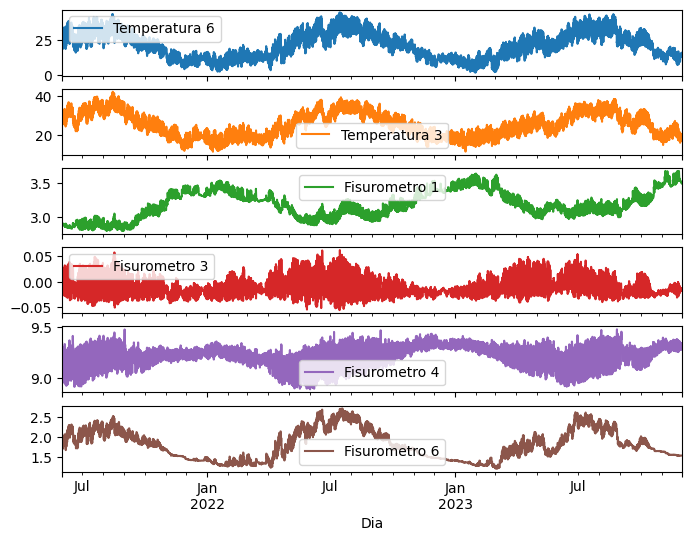

In [10]:
## Gráficas de variables de interés durante todo el dataset

plot_cols = [ 'Temperatura 6', 'Temperatura 3', 'Fisurometro 1', 'Fisurometro 3', 'Fisurometro 4', 'Fisurometro 6']
plot_features = df_filter[plot_cols]
_ = plot_features.plot(subplots=True)


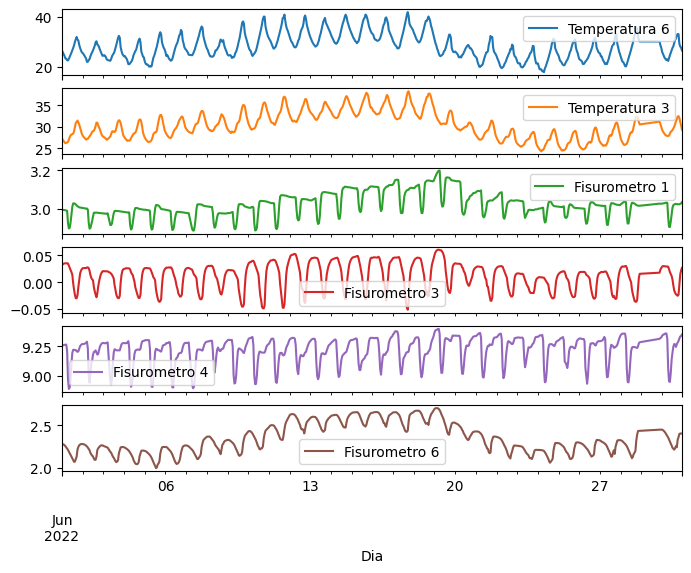

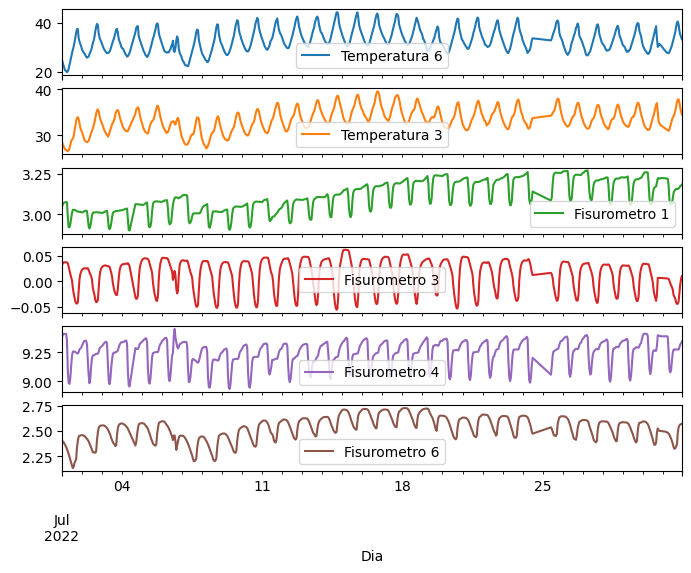

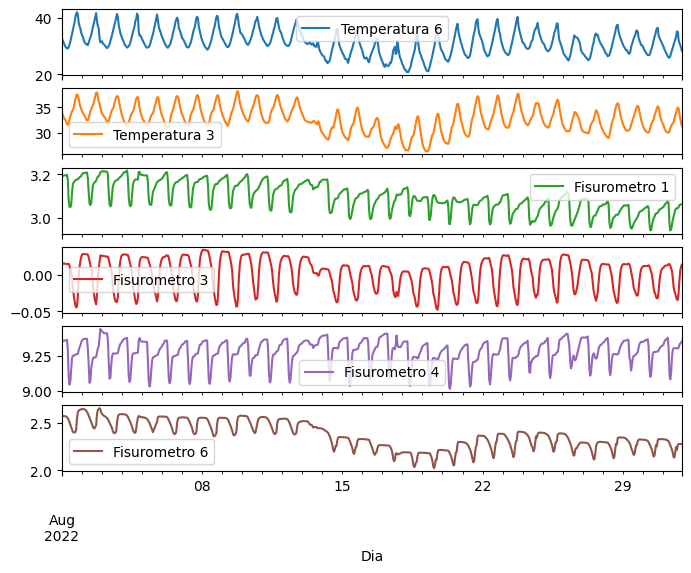

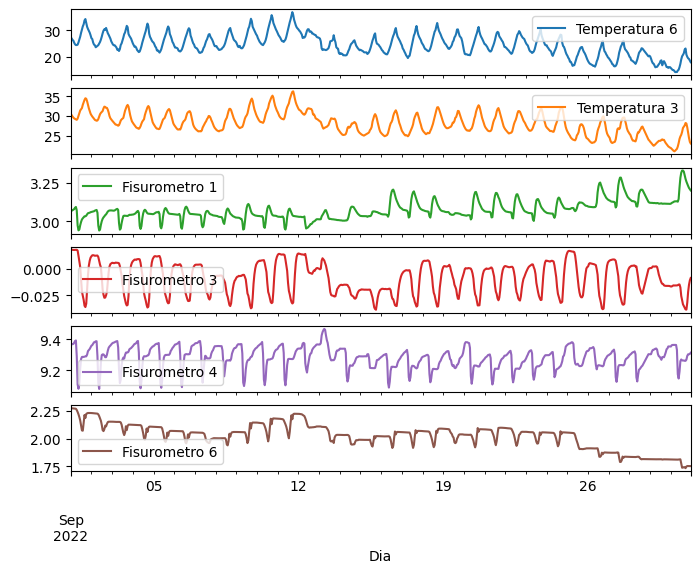

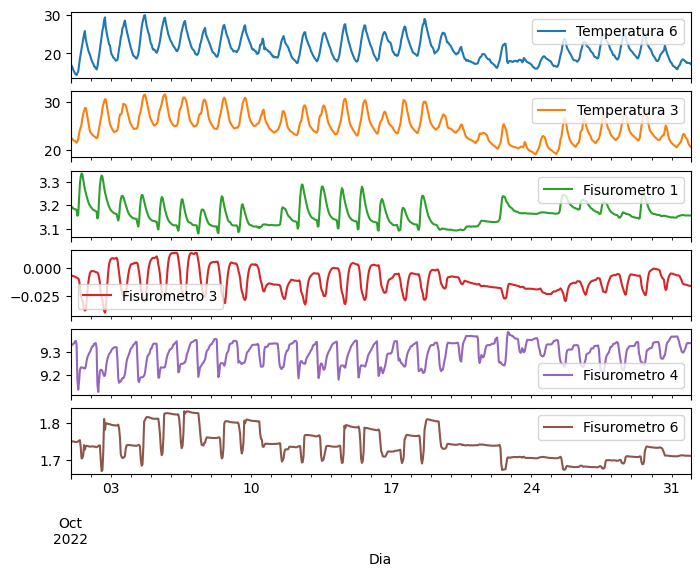

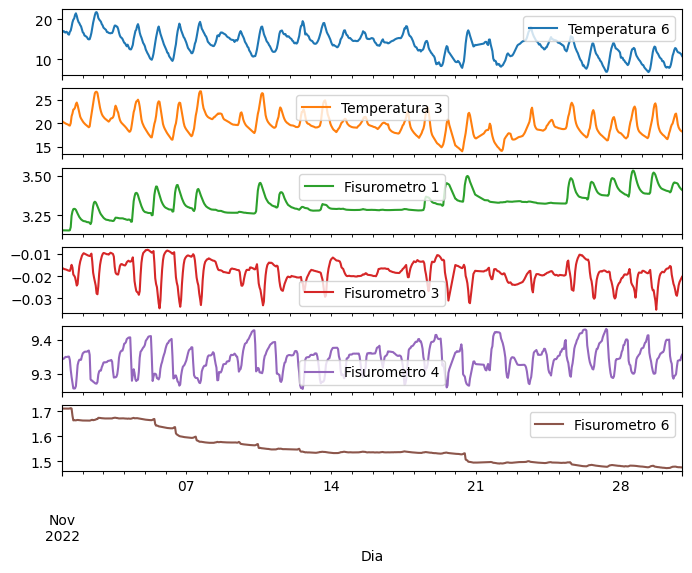

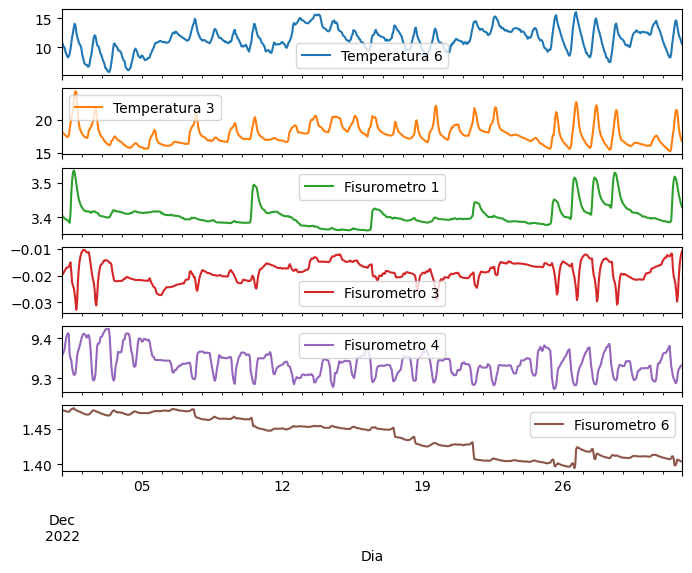

In [11]:
## Gráficas de meses de interés de las variables a estudiar

year = [2021]
months = [6, 7, 8, 9, 10, 11, 12]


for month in months:
    plot_features = df_filter[plot_cols]
    filtered_data = plot_features[(plot_features.index.year.isin([2022])) &
                                  (plot_features.index.month.isin([month]))]
    _ = filtered_data.plot(subplots=True)

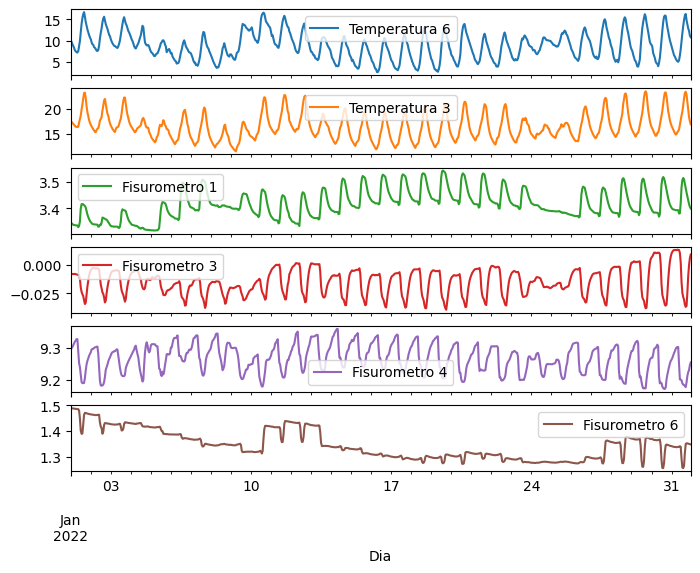

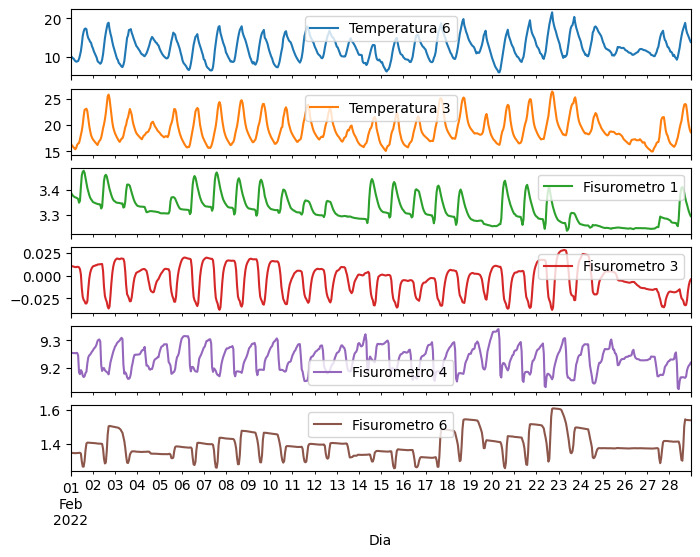

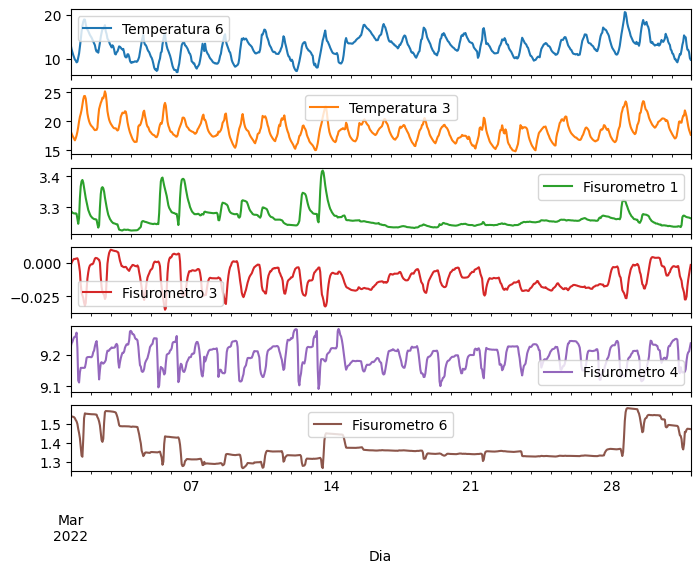

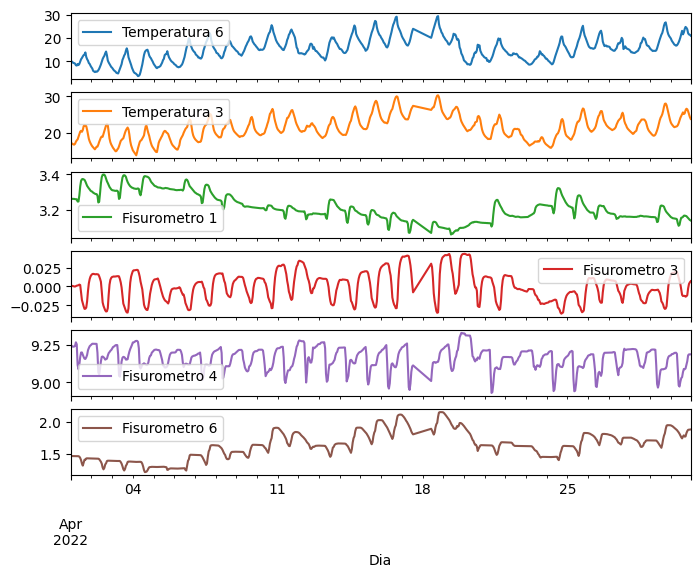

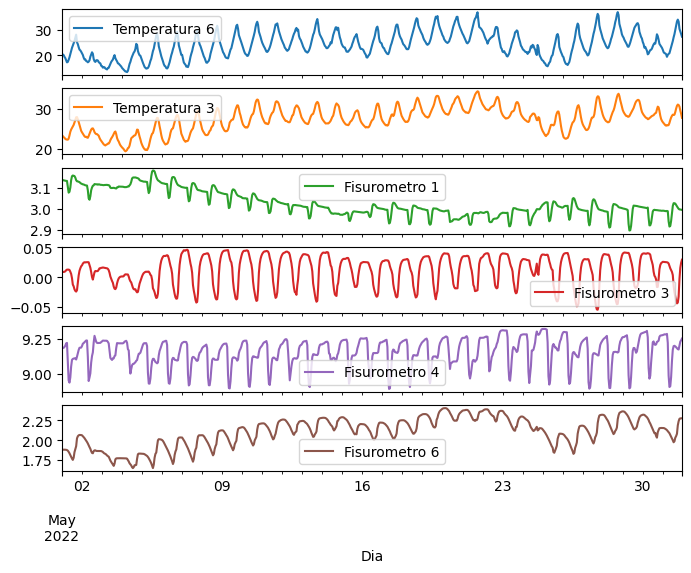

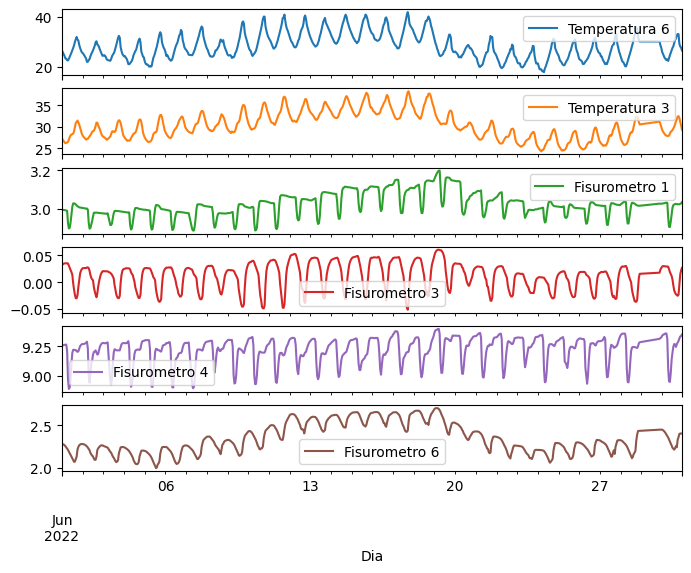

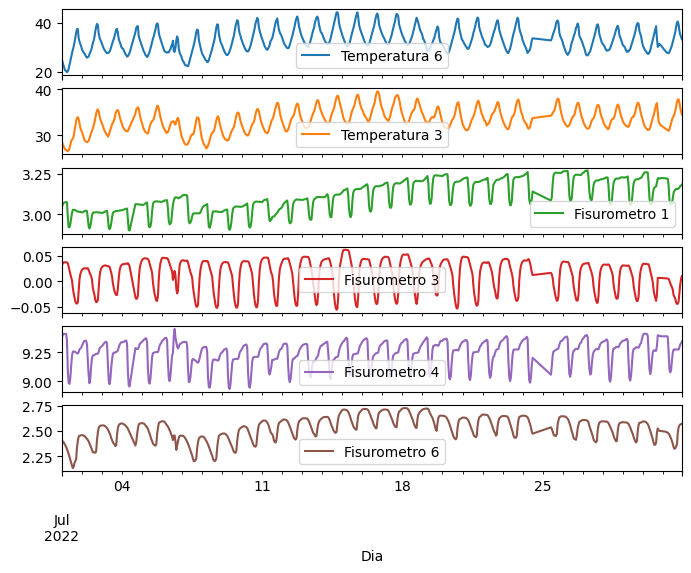

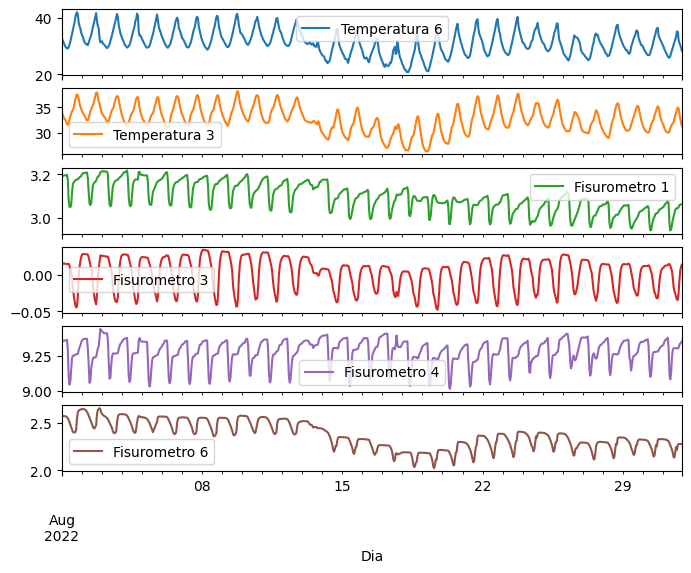

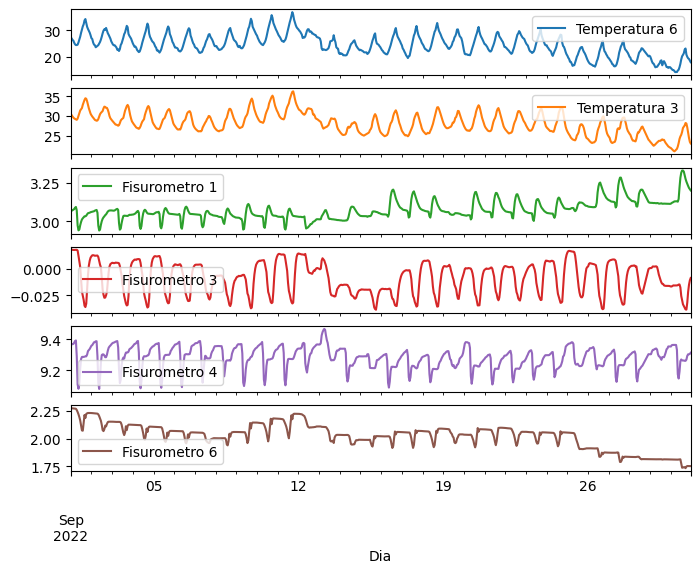

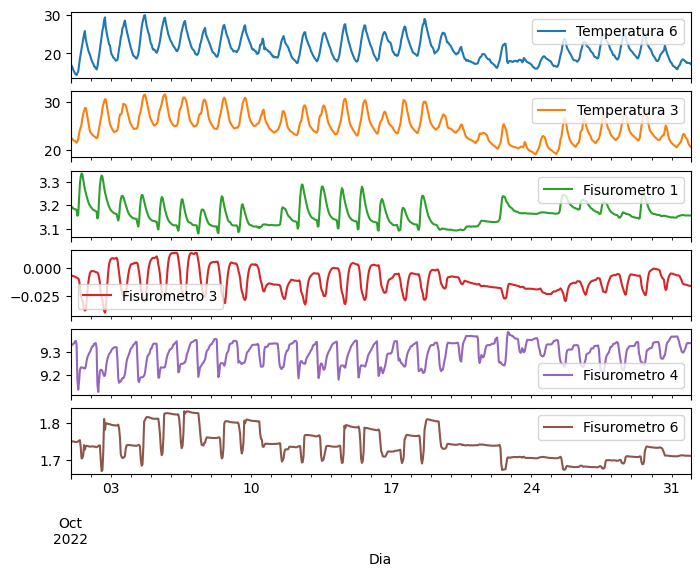

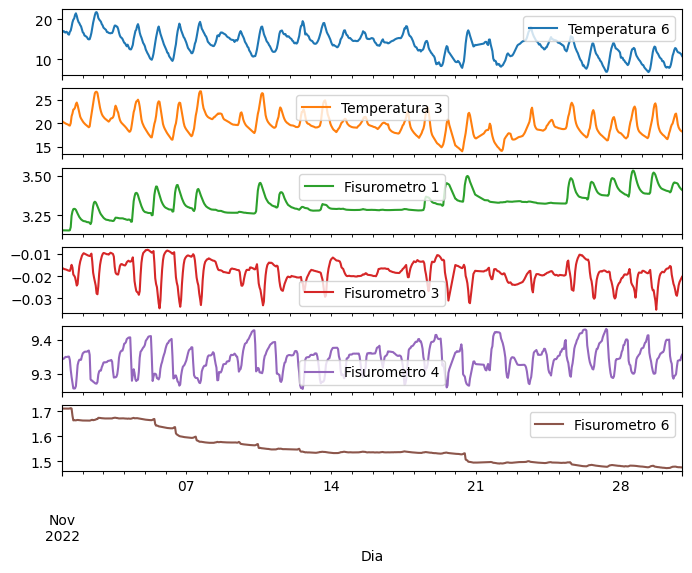

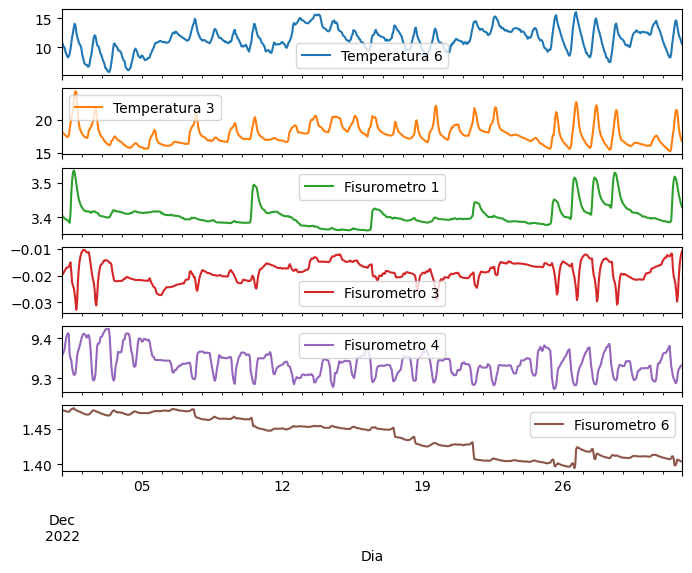

In [12]:
## Gráficas de meses de interés de las variables a estudiar

year = [2022]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


for month in months:
    plot_features = df_filter[plot_cols]
    filtered_data = plot_features[(plot_features.index.year.isin([2022])) &
                                  (plot_features.index.month.isin([month]))]
    _ = filtered_data.plot(subplots=True)

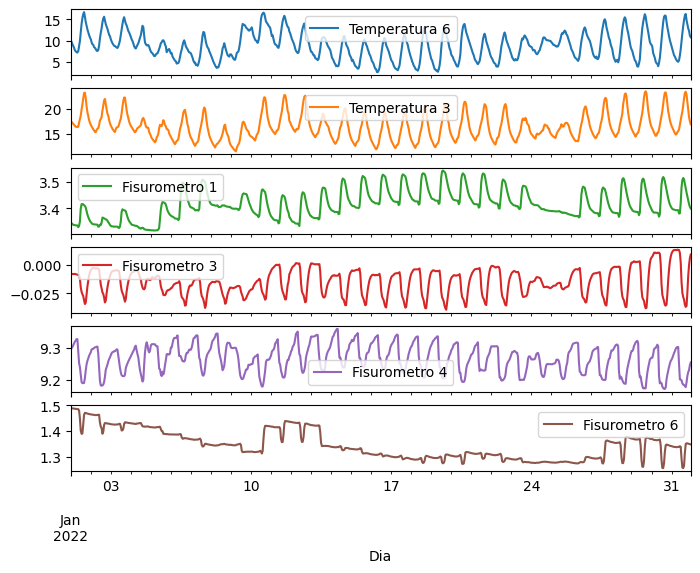

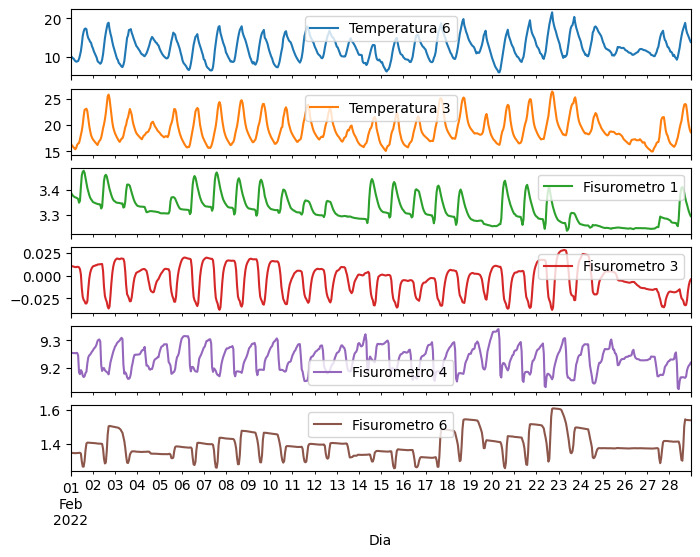

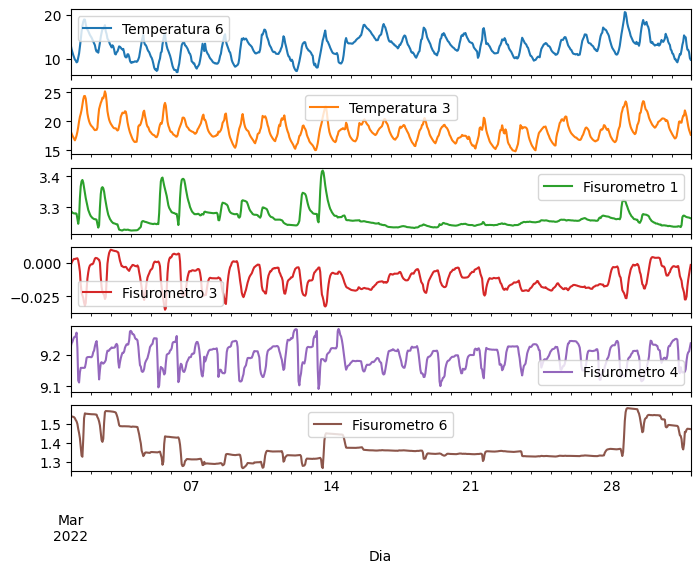

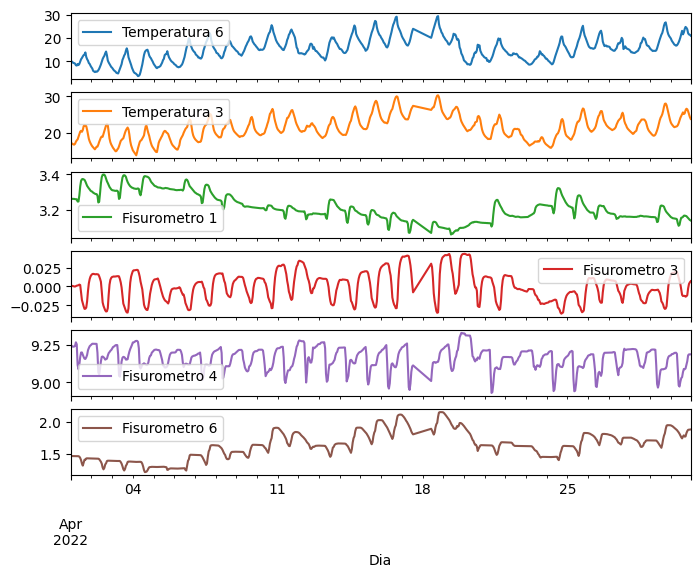

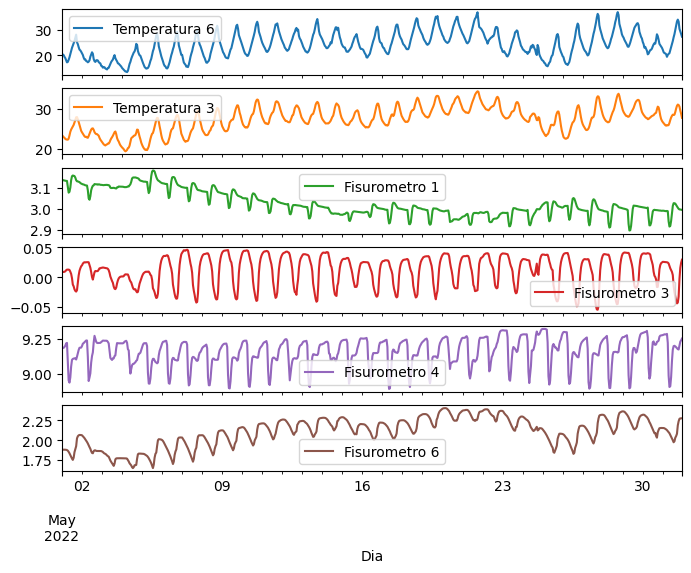

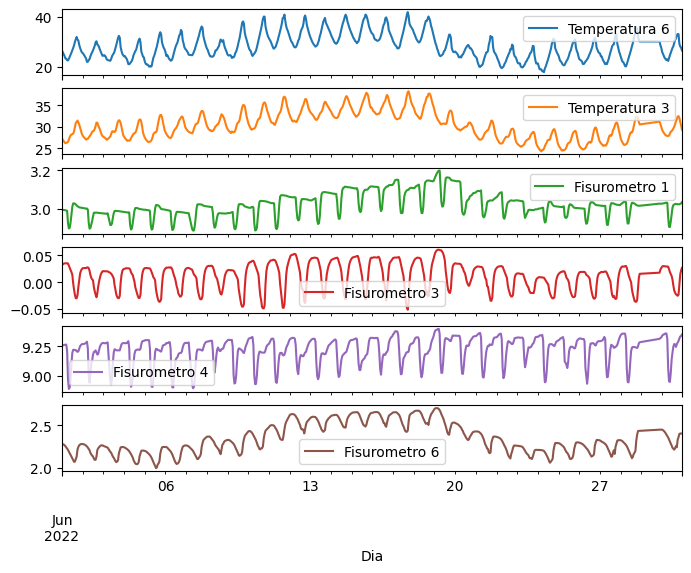

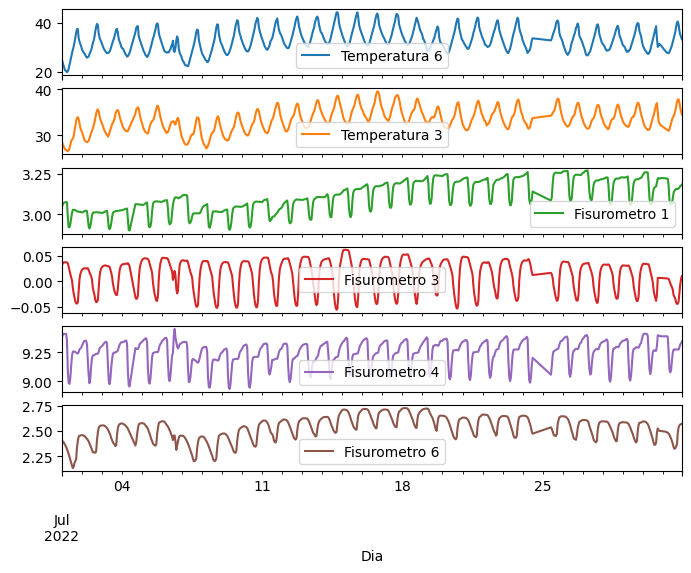

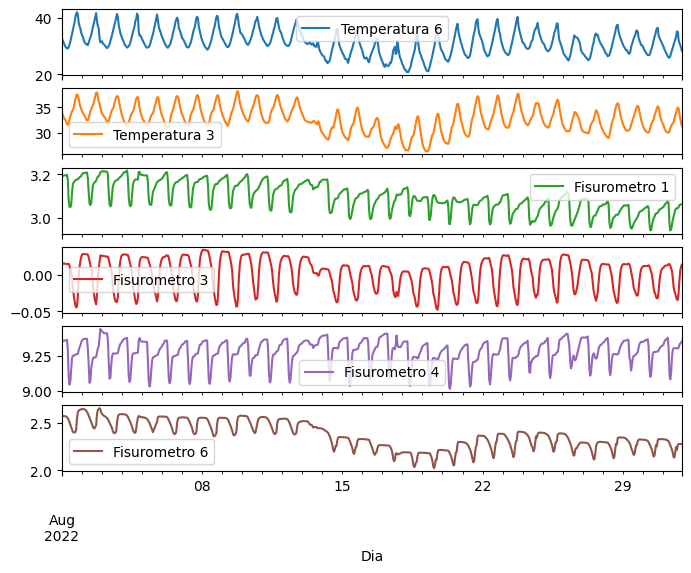

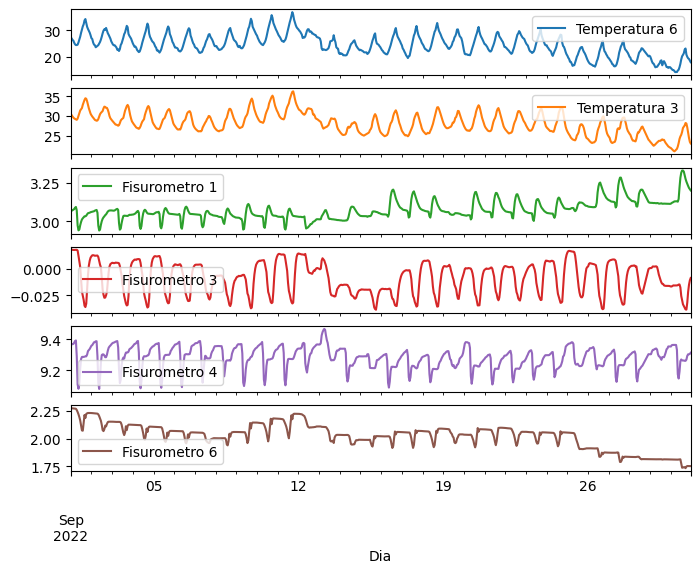

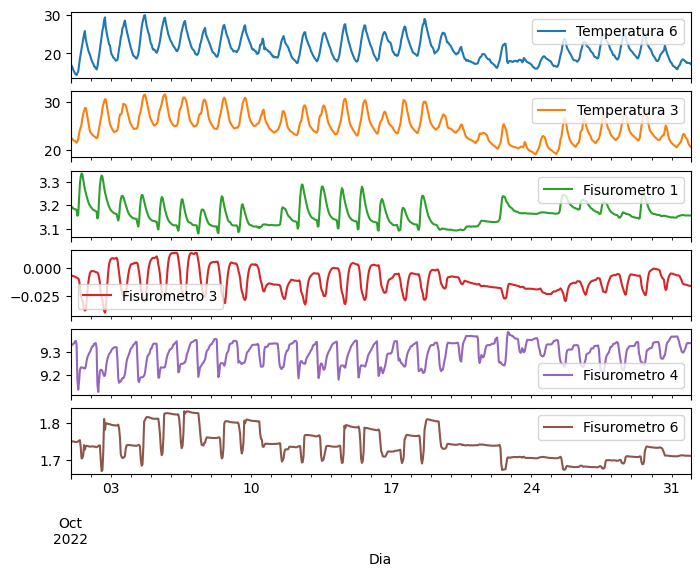

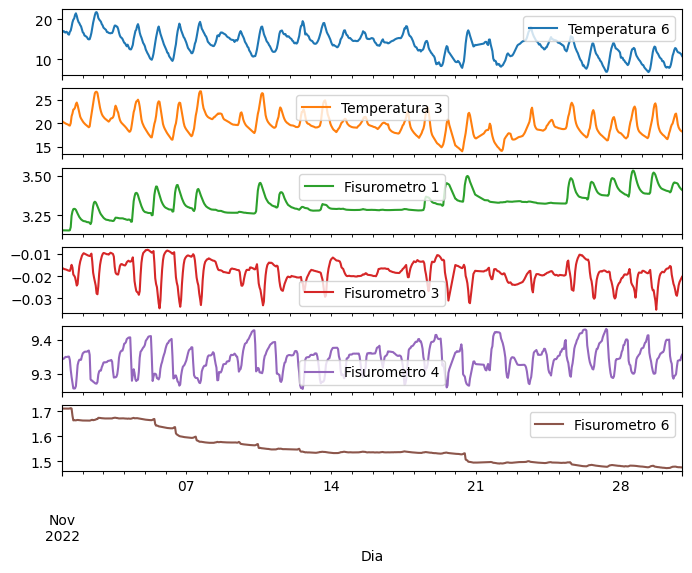

In [13]:
## Gráficas de meses de interés de las variables a estudiar

year = [2023]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


for month in months:
    plot_features = df_filter[plot_cols]
    filtered_data = plot_features[(plot_features.index.year.isin([2022])) &
                                  (plot_features.index.month.isin([month]))]
    _ = filtered_data.plot(subplots=True)

#### Conversión de la variable Fecha

Para tomar en cuenta la periodicidad de las señales, se transforma la fecha en segundos:

In [14]:
date_time = pd.to_datetime(df_filter.index.values, errors='coerce')
timestamp_s = date_time.map(pd.Timestamp.timestamp)


Considerando que la variación de la temperatura tiene dos ciclos prestablecidos, el primero el ciclo diario y el segundo el ciclo anual, se presume que su influencia en la fisuración debe estar relacionada de igual manera.

Para considerar este fenómeno se generan señales periodicas con funciones seno y coseno para considerar el ciclo de hora del día y la estación del año.

In [15]:
day = 24*60*60
year = (365.2425)*day

df_filter['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_filter['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_filter['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_filter['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [16]:
df_filter.describe().transpose()

count       mean        std        min        25%  \
Inclinometro 1  21914.0  -0.011857   0.054401  -0.146054  -0.056010   
Fisurometro 1   21914.0   3.197468   0.183775   2.802430   3.063949   
Inclinometro 3  21914.0   0.012664   0.035237  -0.068145  -0.017113   
Fisurometro 3   21914.0  -0.004055   0.020396  -0.055508  -0.019791   
Inclinometro 4  21914.0  -0.053457   0.050285  -0.161941  -0.090106   
Fisurometro 4   21914.0   9.252176   0.086507   8.887338   9.206737   
Inclinometro 6  21914.0   0.034034   0.077800  -0.136319  -0.036035   
Fisurometro 6   21914.0   1.830677   0.378845   1.202912   1.491375   
Inclinometro 2  21914.0   0.152430   0.054970   0.044799   0.104241   
Inclinometro 5  21914.0   0.356422   0.021243   0.288131   0.341675   
Temperatura 3   21914.0  24.884882   6.307276  11.583668  19.295254   
Temperatura 6   21914.0  20.414819   8.728295   2.004406  13.037163   
Humedad 3       21914.0  33.061175  12.518985   7.377693  23.238720   
Humedad 6       21914.0  46.544284  20.543080   4.756367  29.777448   
Day sin         21914.0  -0.000012   0.707093  -1.000000  -0.707107   
Day cos         21914.0   0.000090   0.707153  -1.000000  -0.707107   
Year sin        21914.0  -0.109577   0.698585  -1.000000  -0.793379   
Year cos        21914.0  -0.064847   0.704139  -1.000000  -0.778525   

                         50%        75%        max  
Inclinometro 1 -7.574867e-03   0.038768   0.080129  
Fisurometro 1   3.188076e+00   3.337813   3.681260  
Inclinometro 3  1.197576e-02   0.047156   0.095135  
Fisurometro 3  -8.703612e-03   0.010759   0.061346  
Inclinometro 4 -5.235785e-02  -0.016221   0.060330  
Fisurometro 4   9.263687e+00   9.312865   9.476392  
Inclinometro 6  3.674210e-02   0.099613   0.208173  
Fisurometro 6   1.791324e+00   2.141391   2.727307  
Inclinometro 2  1.474542e-01   0.198949   0.279967  
Inclinometro 5  3.557483e-01   0.371176   0.429275  
Temperatura 3   2.455607e+01  30.225389  42.417588  
Temperatura 6   2.020410e+01  27.239291  44.513927  
Humedad 3       3.072614e+01  41.675307  73.793944  
Humedad 6       4.513592e+01  61.914768  96.819167  
Day sin        -1.303566e-14   0.707107   1.000000  
Day cos        -1.552518e-14   0.707107   1.000000  
Year sin       -2.059243e-01   0.555422   1.000000  
Year cos       -1.066297e-01   0.627661   1.000000

Text(0.5, 1.0, 'Señal de hora del día')

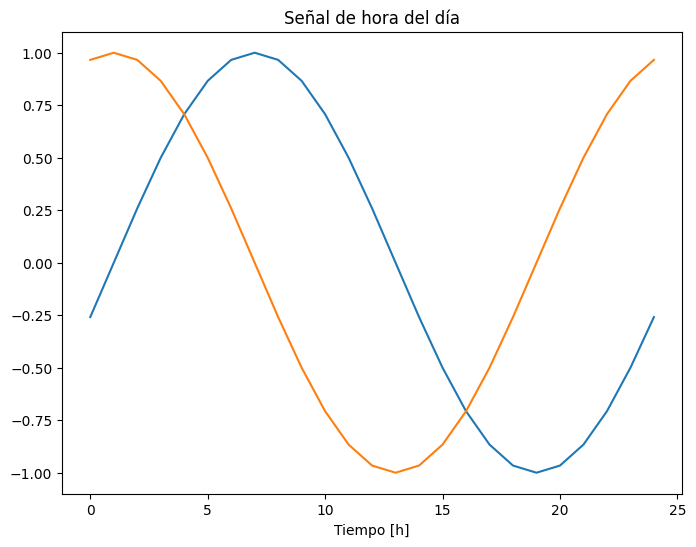

In [17]:
plt.plot(np.array(df_filter['Day sin'])[:25])
plt.plot(np.array(df_filter['Day cos'])[:25])
plt.xlabel('Tiempo [h]')
plt.title('Señal de hora del día')

Text(0.5, 1.0, 'Señal de Época del Año')

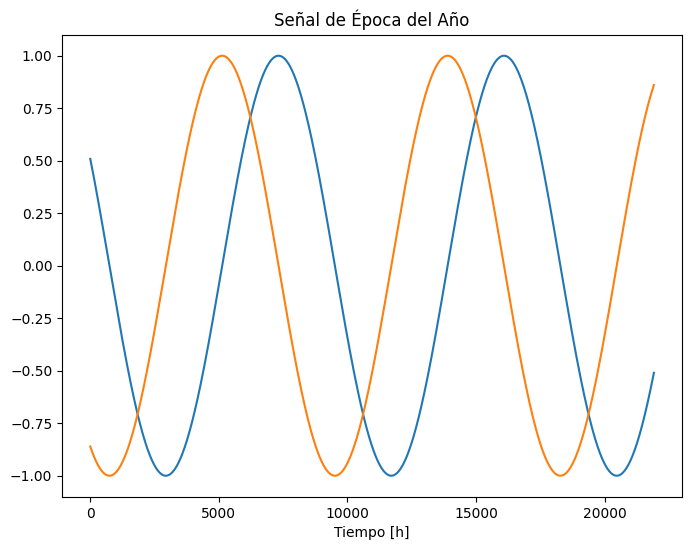

In [18]:
plt.plot(np.array(df_filter['Year sin']))
plt.plot(np.array(df_filter['Year cos']))
plt.xlabel('Tiempo [h]')
plt.title('Señal de Época del Año')

A manera de comprobación, se realiza la Transformada Rápida de Fourier para revisar la frecuencia que tiene los datos para cada uno de los parámetros y así corroborar la suposición. La gráfica se ha rescalado para mostrar la frecuencia en años y en días. Se observa picos en las frecuencias anuales y diarias

In [19]:
## Linea necesaria si el indice de la base de datos de pandas afecta el entrenamiento

df_filter = df_filter.reset_index(drop=True)

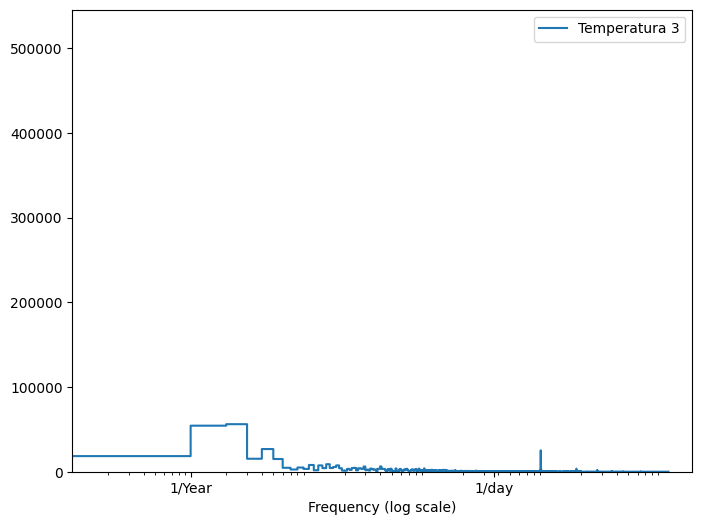

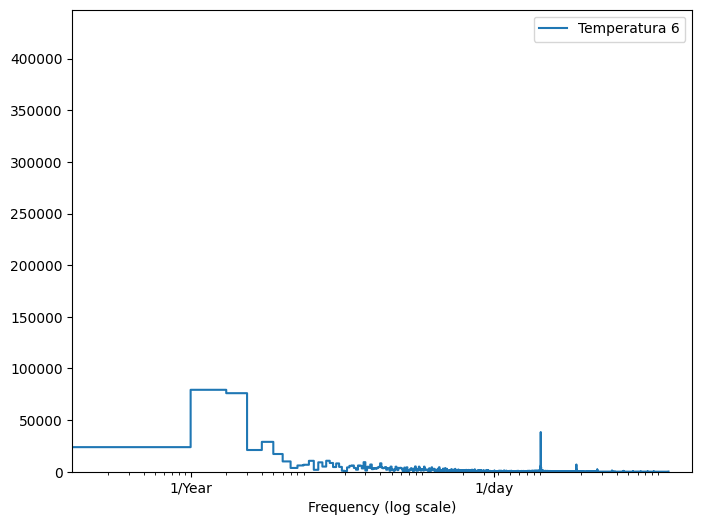

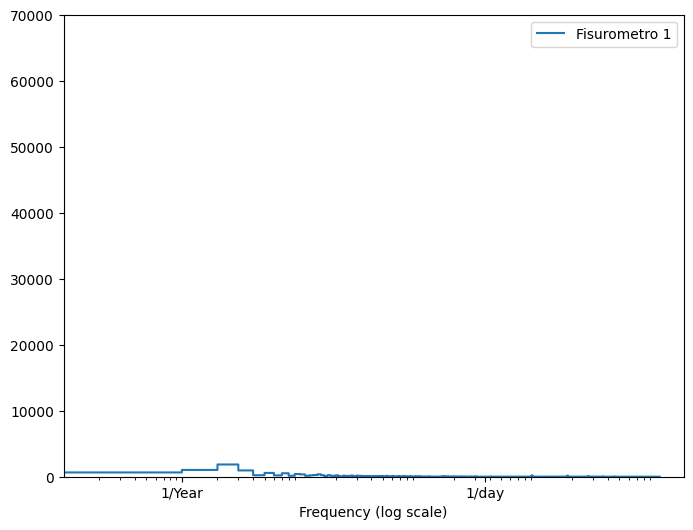

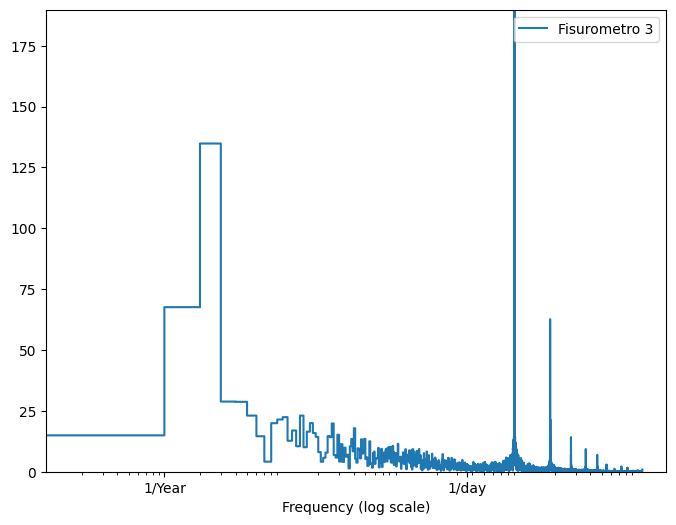

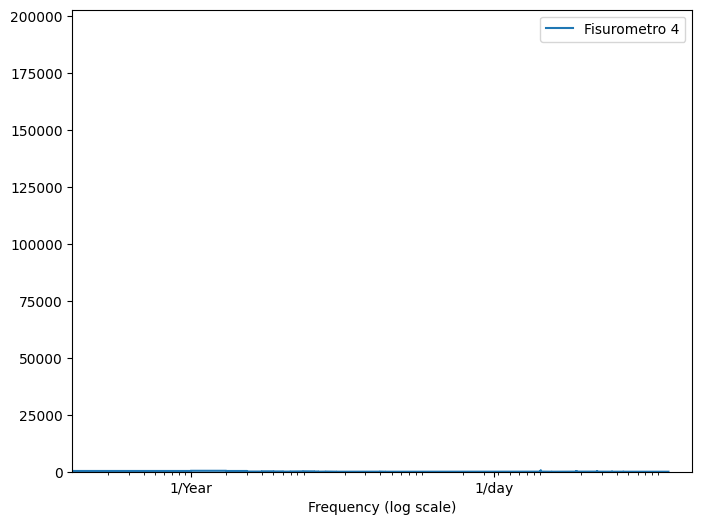

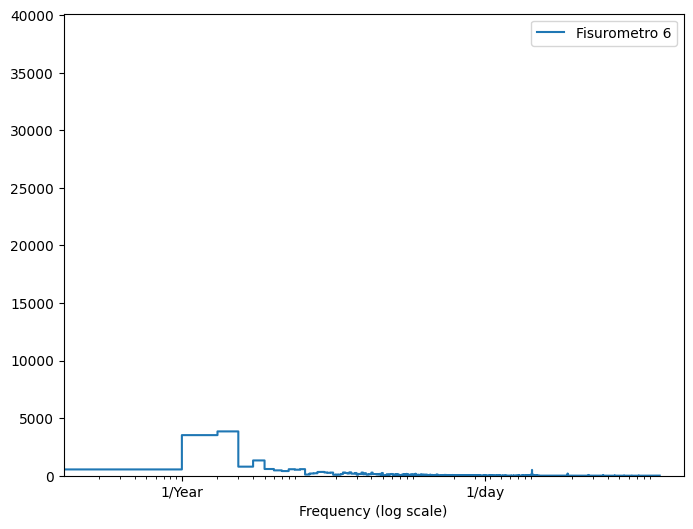

In [20]:
plot_cols = [ 'Temperatura 3', 'Temperatura 6', 'Fisurometro 1', 'Fisurometro 3', 'Fisurometro 4', 'Fisurometro 6']

for sensor in plot_cols:
    fft = tf.signal.rfft(df_filter[sensor])
    f_per_dataset = np.arange(0, len(fft))

    n_samples_h = len(df_filter[sensor])
    hours_per_year = 24*365.2524
    years_per_dataset = n_samples_h/(hours_per_year)

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_dataset, np.abs(fft), label=sensor)
    plt.legend(loc='upper right')
    plt.xscale('log')
    plt.ylim(0, max(np.abs(fft)))
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
    
    _ = plt.xlabel('Frequency (log scale)')
    plt.show()
    

### Muestreo de la base de datos

Para el entrenamiento de los algorigmos de Machine Learning, se divide la base de datos en un `(70%, 20%, 10%)` para el entrenamiento (train), validación (validation) y ensayo (test). No se realiza una mezcla aleatoria de los datos antes de la división principalmente por dos razones:

1. Garantiza que aún sea posible dividir los datos en ventanas de muestras consecutivas.
2. Garantiza que los resultados de la validación/ensayo sean más realistas y se evalúen en función de los datos recopilados después de entrenar el modelo.

In [21]:
column_indices = {name: i for i, name in enumerate(df_filter.columns)}

n = len(df_filter)
train_df = df_filter[0:int(n*0.7)]
val_df = df_filter[int(n*0.7):int(n*0.9)]
test_df = df_filter[int(n*0.9):]

num_features = df_filter.shape[1]

### Normalización de la base de datos

Antes de llevar a cabo el entrenamiento de una red neuronal, resulta fundamental realizar la escalada de las características. Una práctica común para lograr este escalado es la normalización, que implica restar la media y dividir por la desviación estándar de cada característica.

La media y la desviación estándar se calculan únicamente utilizando los datos de entrenamiento (train), de manera que los modelos no tengan acceso a los valores en los conjuntos de validación y ensayo.


In [22]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Analizando la distribución de los datos mediante un Diagrama de Violin, se puede observar que:

1. sdfas

C:\Users\ingci\AppData\Local\Temp\ipykernel_28980\1801737884.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(df_filter.keys(), rotation=90)


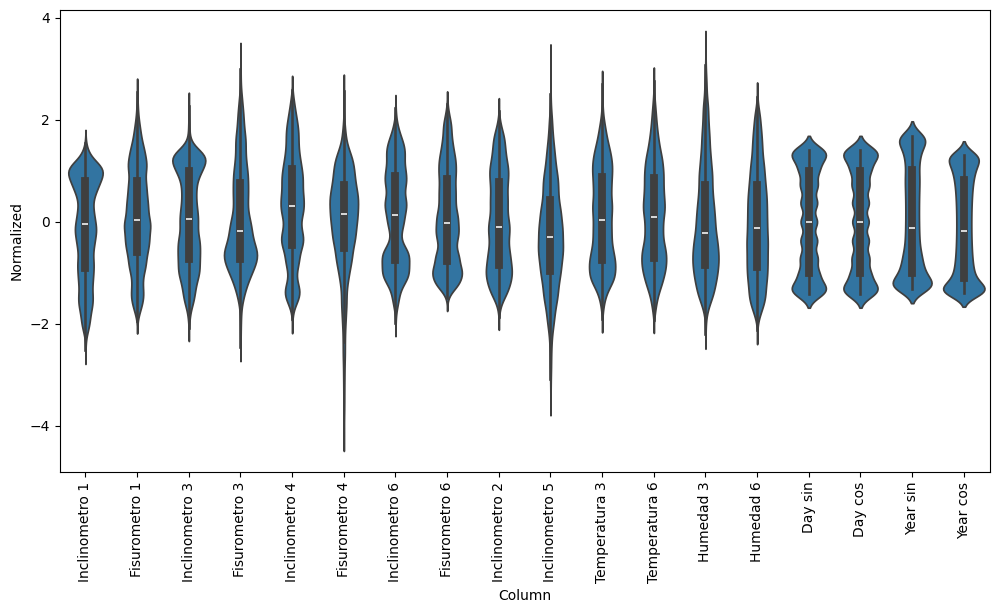

In [23]:
df_std = (df_filter - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_filter.keys(), rotation=90)

## Obtención de ventanas de predicción

Los modelos de Machine Learning aplicados en este trabajo, usarán un conjunto de predicciones basadas en una ventana de muestras consecutivas de datos obtenidos de los sensores.

Las principales características de las ventanas de predicción son:

- El ancho (número de pasos temporales) de las ventanas de predicción y sus etiquetas.
- El desplazamiento temporal entre ellas.
- Qué características se utilizan como entradas, etiquetas o ambas.

En este trabajo se analizan diferentes algoritmos de Machine Learning como son regresiones lineales, lineales, Redes Neuronales (DNN), Redes Neuronales Convolucionales (CNN) y Redes Neuronales Recurrentes (RNN), y estos se los aplica para obtener diferentes tipos de predicciones:

- Predicciones de única salida como de múltiples salidas.
- Predicciones de único paso temporal y múltiples pasos temporales.

Esta sección se centra en implementar la ventana de datos de manera que pueda reutilizarse para todos esos modelos.


Para este análisis, se va a realizar dos tipos de predicciones:

1. Realizar una única predicción 24 horas en el futuro, dadas 24 horas de historia.

2. Realizar una predicción una hora en el futuro, dadas seis horas de historia.

### 1. Creación de bases de datos de Índices y desplazamientos de señal



In [24]:
class WindowGenerator():
    
      def __init__(self, input_width, label_width, shift,
                   train_df=train_df, val_df=val_df, test_df=test_df,
                   label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    
      def __repr__(self):
            return '\n'.join([
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'])

### Ejemplo de definición de las variables de análisis a predecir:

En esta parte se definen el número de instantes de tiempo que se dará al algoritmo como entrada (input_width), la cantidad de instantes de tiempo a predecir (label_width) y la cantidad de instantes en el futuro que debe predecir (shift).


In [25]:
label_columns = ['Fisurometro 1']

In [26]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns = label_columns)
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Fisurometro 1']

In [27]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns = label_columns)
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Fisurometro 1']

### 2. División de muestras en ventanas de Entrada (input) y de etiquetas (labels)



In [28]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

Ejemplo de creación de ventanas de Input y Labels para los sensores de análisis:


In [29]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 18)
Inputs shape: (3, 6, 18)
Labels shape: (3, 1, 1)


El siguiente ejemplo toma 7 valores cada 100 horas de los datos de entrenamiento, los cuales se empaquetan dentro de un tensor. En este tensor, el primer índice representa el numero de muestras (batch), el siguiente indice representa las horas (time) y el ultimo indice representa las caracteristicas que se están analizando (features).

El código anterior toma un lote de tres ventanas de 7 pasos temporales (horas) con 18 sensores (features) en cada paso temporal. Las divide en un lote de entradas de 18 features en 6 pasos temporales y una etiqueta de 1 features en 1 paso temporal. La etiqueta sólo tiene una característica porque el `WindowGenerator` fue inicializado con `label_columns=['Fisurometro 1']`.

### 3. Impresión

Función de graficación que permite la visualización de la ventana análisis. En esta función se permite graficar las varibles de entrada, las variables de etiqueta y la predicción del modelo si se define.

In [30]:
w2.example = example_inputs, example_labels

In [31]:
def plot(self, model=None, plot_col=None, max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
              label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
              label_col_index = plot_col_index


        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')

WindowGenerator.plot = plot

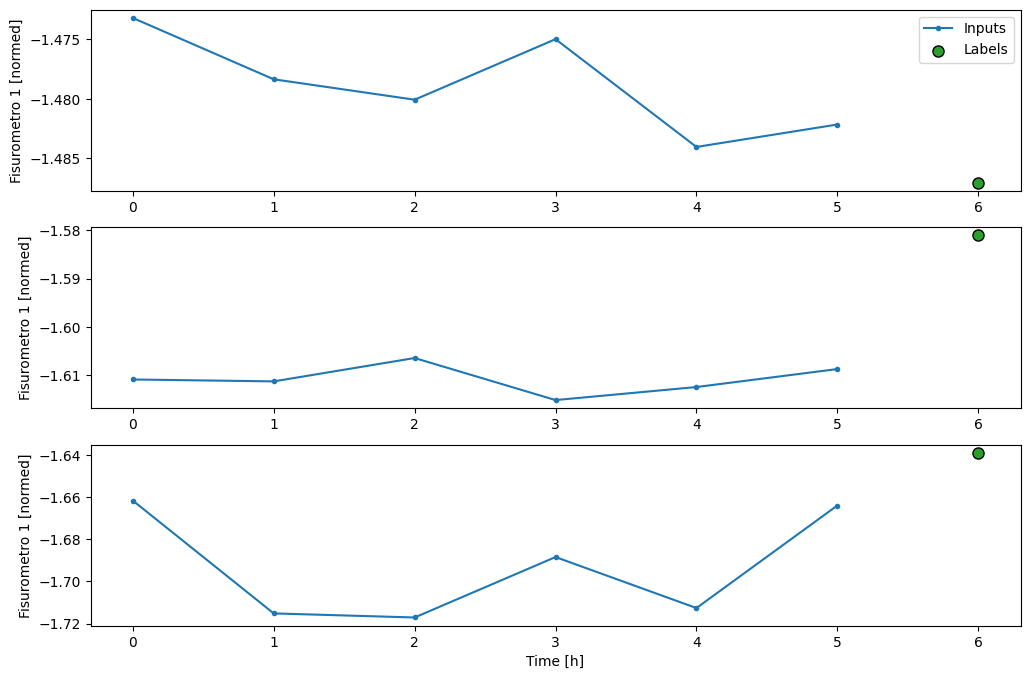

In [32]:
w2.plot(plot_col=label_columns[0])

### 4. Creación de Datasets usando Tensorflow `tf.data.Dataset`

Finalmente, se utiliza el método `make_dataset` para tomar un DataFrame de series temporales y convertirlo en un `tf.data.Dataset` de pares `(input_window, label_window)` utilizando la función `tf.keras.utils.timeseries_dataset_from_array`:

In [33]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)
    ds = ds.map(self.split_window)
    return ds

WindowGenerator.make_dataset = make_dataset

El objeto `WindowGenerator` contiene los datos de entrenamiento, validación y test.

Se incluyen propiedades para acceder a ellos como `tf.data.Dataset`s utilizando el método `make_dataset` definido anteriormente. Además, se añade un lote de ejemplo estándar para facilitar el acceso y la visualización de resultados:

In [34]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

Ahora, el objeto `WindowGenerator` genera acceso a los datasets creados `tf.data.Dataset`, para iterar fácilmente sobre los datos.

La propiedad `Dataset.element_spec` permiten obtener la estructura, los tipos de datos y las formas de los elementos del conjunto de datos.

In [35]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 18), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

Iterando sobre un `Dataset` se obtienen las dimensiones de los tensores para el entrenamiento en lotes concretos:

In [36]:
for example_inputs, example_labels in w2.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')
    

Inputs shape (batch, time, features): (32, 6, 18)
Labels shape (batch, time, features): (32, 1, 1)


## A. Análisis con Modelos de un solo paso

Se empieza construyendo un modelo que predice el valor de una característica de análisis una hora en el futuro, basándose únicamente en la hora actual.

Se configura un objeto `WindowGenerator` para producir estos pares de un solo paso `(input, label)`:

In [37]:
label_columns = ['Fisurometro 1']

In [38]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=label_columns)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Fisurometro 1']

El objeto `window` crea `tf.data.Dataset`s a partir de los conjuntos de entrenamiento, validación y prueba, lo que permite iterar fácilmente sobre lotes de datos.


In [39]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 18)
Labels shape (batch, time, features): (32, 1, 1)


### A1. Línea de base

Se construye una línea de base de rendimiento como punto de comparación con los modelos posteriores más complicados.

Esta primera tarea consiste en predecir una hora en el futuro, dado el valor en la hora actual de todas las características. Los valores actuales incluyen la caracteristica actual. 

Por lo tanto, se empieza con un modelo que sólo devuelve la caracteristica actual como predicción, prediciendo "Sin cambios". En resumen, la clase Baseline es un modelo simple que, cuando se llama con datos de entrada, devuelve los mismos datos si label_index es None, o selecciona la columna de etiquetas específica y agrega una dimensión adicional si label_index está definido. Este tipo de modelo básico sirve como un punto de referencia para comparar con los modelos posteriores.


In [40]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

Iniciar y evaluar este modelo:

In [41]:
baseline = Baseline(label_index=column_indices['Fisurometro 1'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['A1_Baseline_UnPaso'] = baseline.evaluate(single_step_window.val)
performance['A1_Baseline_UnPaso'] = baseline.evaluate(single_step_window.test, verbose=0)

137/137 [==============================] - 1s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0534


Se genera un conjunto de datos compuesto por 24 entradas y sus respectivas etiquetas con el fin de visualizar el rendimiento del modelo. Para llevar a cabo este proceso, se utiliza un `WindowGenerator` de mayor amplitud, el cual produce ventanas de 24 horas de entradas consecutivas y sus etiquetas correspondientes simultáneamente. El modelo continúa realizando predicciones para una hora en el futuro, basándose en un único paso de tiempo de entrada.



In [42]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['Fisurometro 1'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['Fisurometro 1']

Esta ventana expandida puede ser proporcionada directamente al mismo modelo `baseline` sin realizar ninguna modificación en el código. Esto es factible debido a que las entradas y las etiquetas comparten el mismo número de pasos temporales, y la línea de base simplemente reenvía la entrada a la salida:


Como resultado, se observa que el modelo genera predicciones desplazadas una hora hacia la derecha:

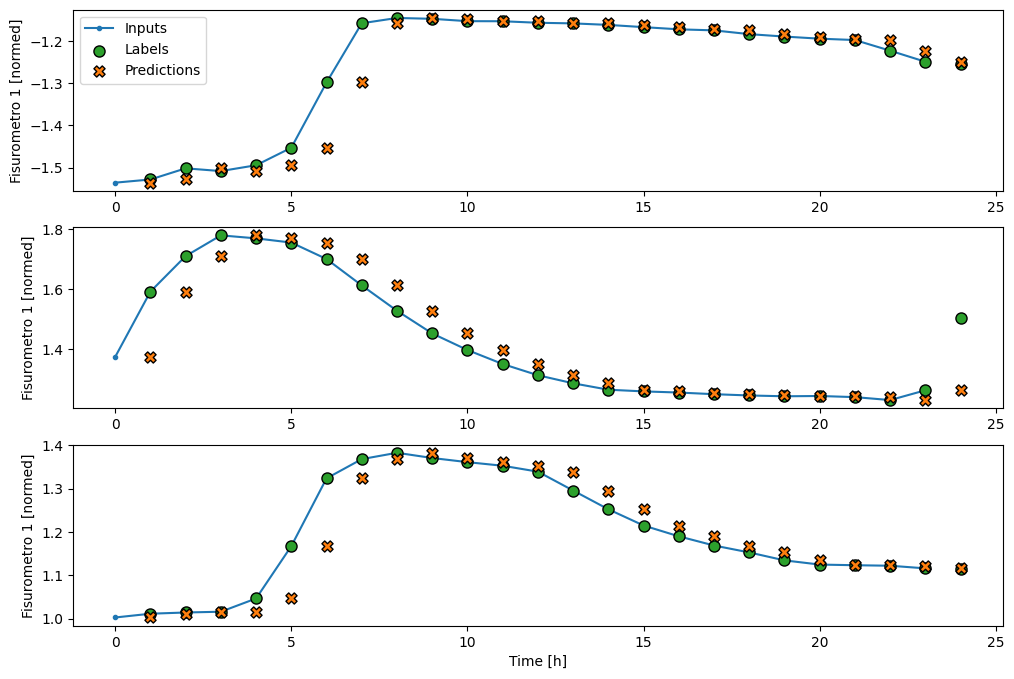

In [43]:
wide_window.plot(baseline, plot_col=label_columns[0])

En los gráficos anteriores, se presentan tres ejemplos donde el modelo de un solo paso se ejecuta a lo largo de 24 horas. A continuación, se proporciona una explicación detallada:

- La línea azul "Entradas" representa las características de entrada en cada paso temporal. Es importante señalar que el modelo recibe todas estas características (sensores), aunque en el gráfico solo se muestre una característica para simplificar la visualización.

- Los puntos verdes etiquetados como `Labels` indican el valor objetivo de la predicción. Estos puntos se sitúan en el tiempo de predicción y no en el tiempo de entrada. Por esta razón, el rango de etiquetas está desplazado en 1 paso con respecto a las entradas.

- Las cruces naranjas marcadas como `Predicciones` representan las predicciones del modelo para cada paso de tiempo de salida. Si el modelo realizará predicciones perfectas, las cruces naranjas coincidirían directamente con las posiciones de las "etiquetas".
   


### A2. Modelo lineal

El primer modelo para entrenar es realizar una transformación lineal entre la entrada y la salida. En este caso la salida de un paso de tiempo sólo depende de ese paso. 

Se utilizan capas de tipo "Dense", que son neuronas completamente conectadas entre si, sin embargo para realizar la transformación lineal, no se especifica ningun método de activación de la neurona.

In [44]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [45]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 18)
Output shape: (32, 1, 1)


Se define la función para entrenar el modelo, se establecen dos tipos de función considerando como métrica de entrenamiento la media del error absoluto MAE y dos diferentes algoritmos de optimización, Adam y SGD. Este último se toma con un valor de learning rate de 3e-3 inicialmente:

In [46]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=4):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [47]:
 def compile_and_fit_SGD(model, window, patience=4):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3, momentum=0.9),
                  metrics=["mae"]) 

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

 

Se entrena el modelo y evaluar su rendimiento:

In [48]:
history = compile_and_fit(linear, single_step_window)

IPython.display.clear_output()
val_performance['A2_Linear_UnPaso_MAE'] = linear.evaluate(single_step_window.val)
performance['A2_Linear_UnPaso_MAE'] = linear.evaluate(single_step_window.test, verbose=0)

137/137 [==============================] - 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0634


Se presenta acontinuación, el gráfico de predicciones del modelo del ejemplo en el `wide_window`, en el primer gráfico se entrena el algoritmo lineal considerando el modelo ADAM. Se observa que en muchos casos la predicción es claramente mejor que simplemente devolver el valor del Fisurometro de Entrada, pero en algunos casos es peor:

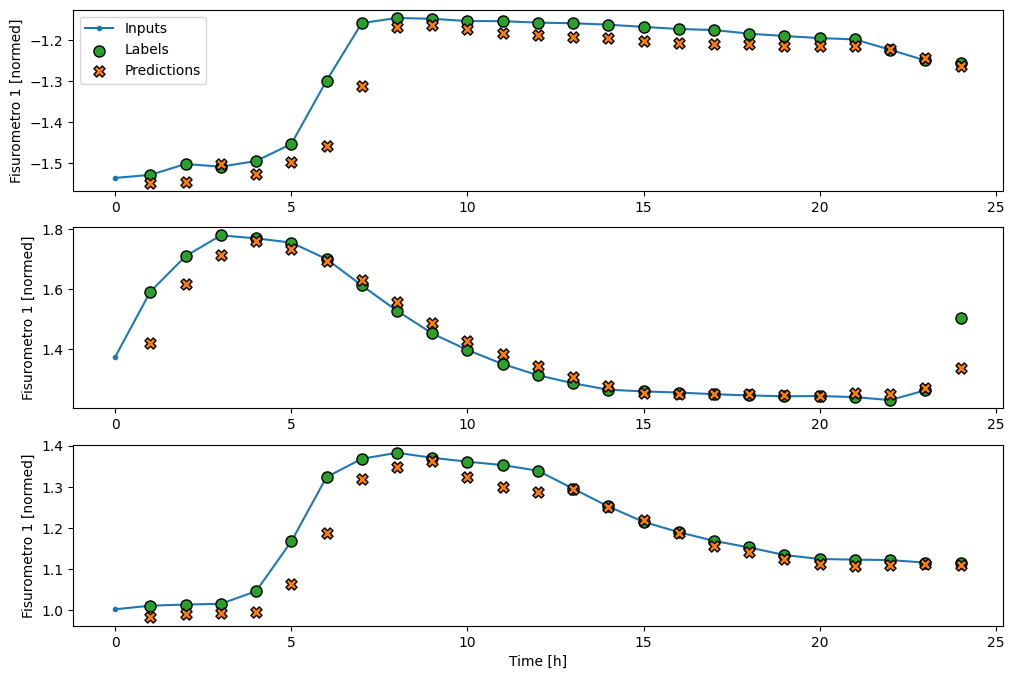

In [49]:
wide_window.plot(linear, plot_col=label_columns[0])

17/17 [==============================] - 0s 18ms/step


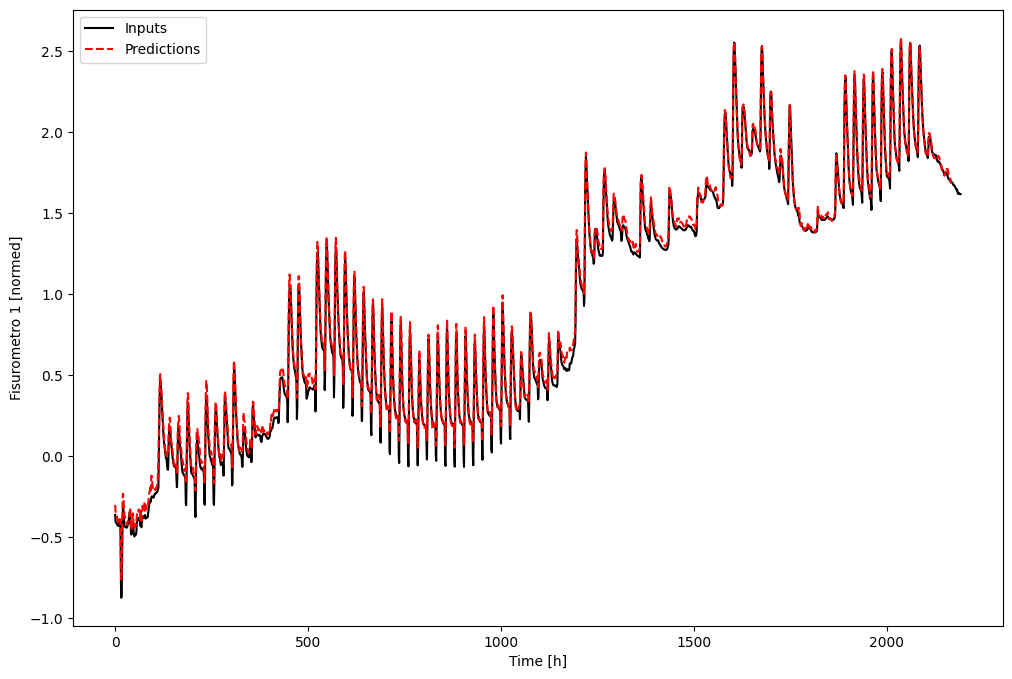

In [100]:
wide_window.plot_all(linear, plot_col=label_columns[0])

In [50]:
linearSGD = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [51]:
history = compile_and_fit_SGD(linearSGD, single_step_window)

IPython.display.clear_output()
val_performance['A2_Linear_UnPaso_SGD'] = linearSGD.evaluate(single_step_window.val)
performance['A2_Linear_UnPaso_SGD'] = linearSGD.evaluate(single_step_window.test, verbose=0)

137/137 [==============================] - 1s 6ms/step - loss: 0.0047 - mae: 0.0623


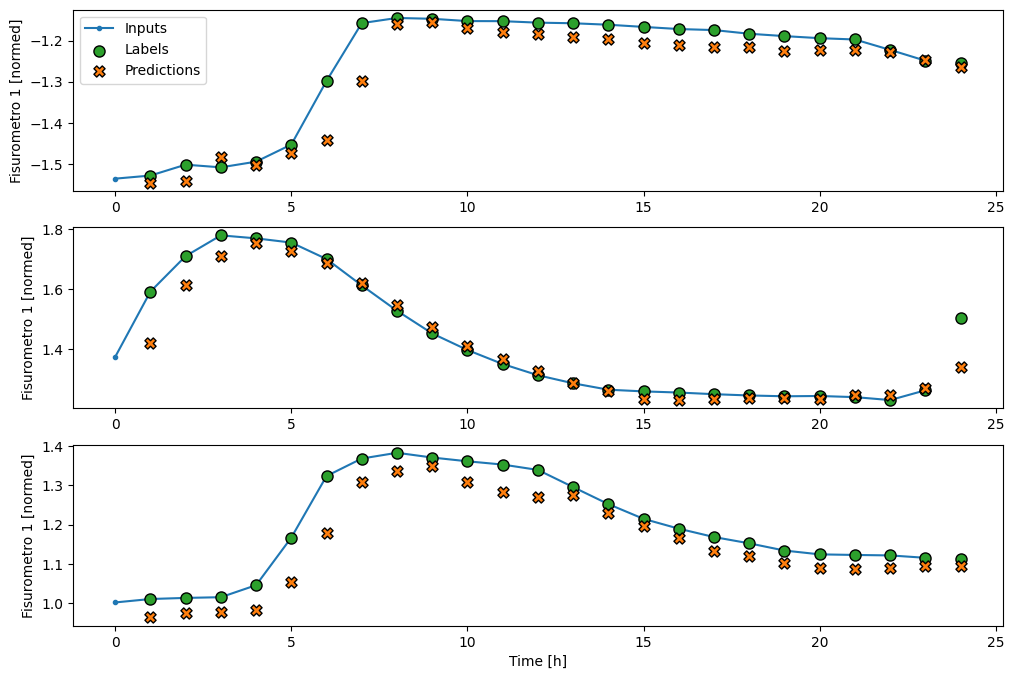

In [52]:
wide_window.plot(linearSGD, plot_col=label_columns[0])

17/17 [==============================] - 1s 19ms/step


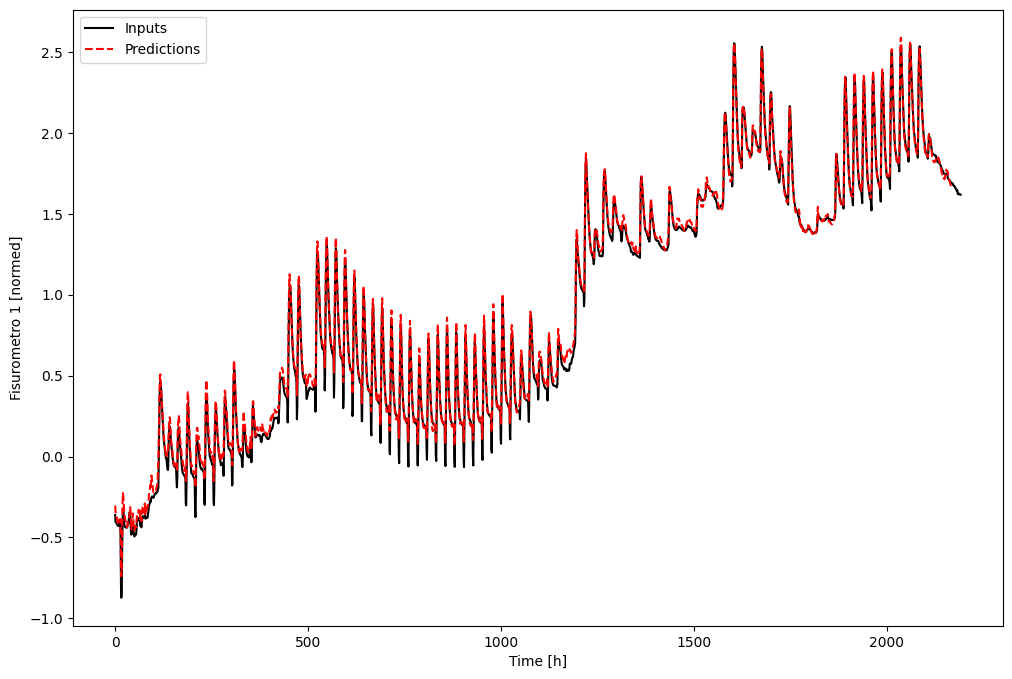

In [101]:
wide_window.plot_all(linearSGD, plot_col=label_columns[0])

Debido a su simpleza, los modelos lineales son facilmente interpetables según el peso que colocan a cada una de las variables para la predicción de la caracteristica deseada. En el siguiente gráfico, un numero mayor asignado a la variable del sensor, representa una mayor importancia a la hora de la predicción del dato del sensor "Fisurometro 1"

### Gráfico modelo MAE

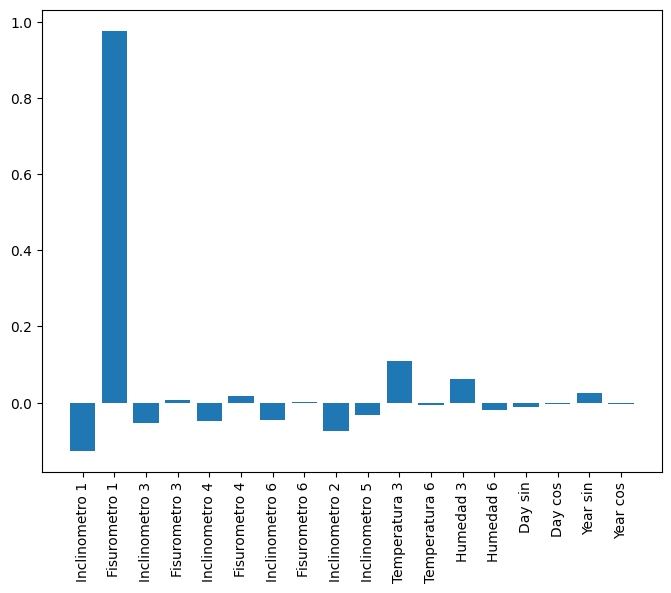

In [53]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### Gráfico modelo SGD

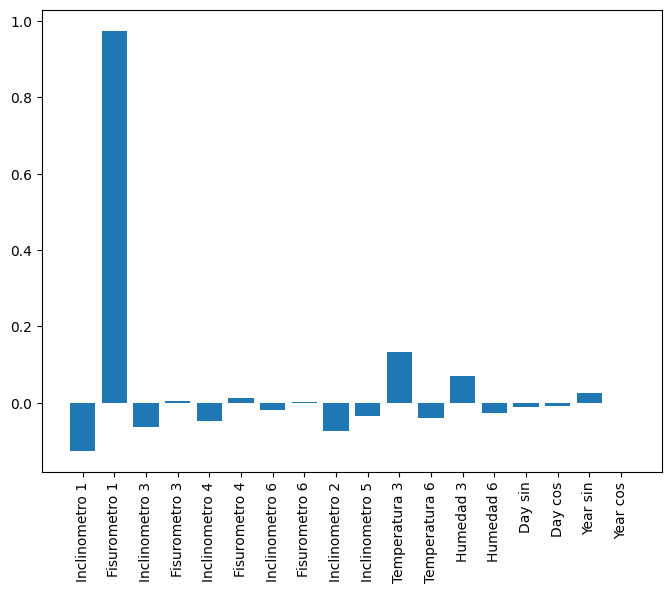

In [54]:
plt.bar(x = range(len(train_df.columns)),
        height=linearSGD.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

### A3. Modelos tipo Dense

El siguiente modelo a analizar, es un modelo simple de red neuronal de 2 capas ocultas que predice una sola caracteristica (Fisurometro 1). El modelo es similar al modelo `lineal`, pero se incluyen neuronas adicionales entre la entrada y salida conectadas completamente `Densas`, las cuales incluyen un método de activación para considerar efectos de **nolinealidad** en las predicciones. El algoritmo empleado para una predicción númerica será `Relu`

In [55]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['A3_Dense_UnPaso_MAE'] = dense.evaluate(single_step_window.val)
performance['A3_Dense_UnPaso_MAE'] = dense.evaluate(single_step_window.test, verbose=0)

137/137 [==============================] - 1s 8ms/step - loss: 0.0133 - mean_absolute_error: 0.0921


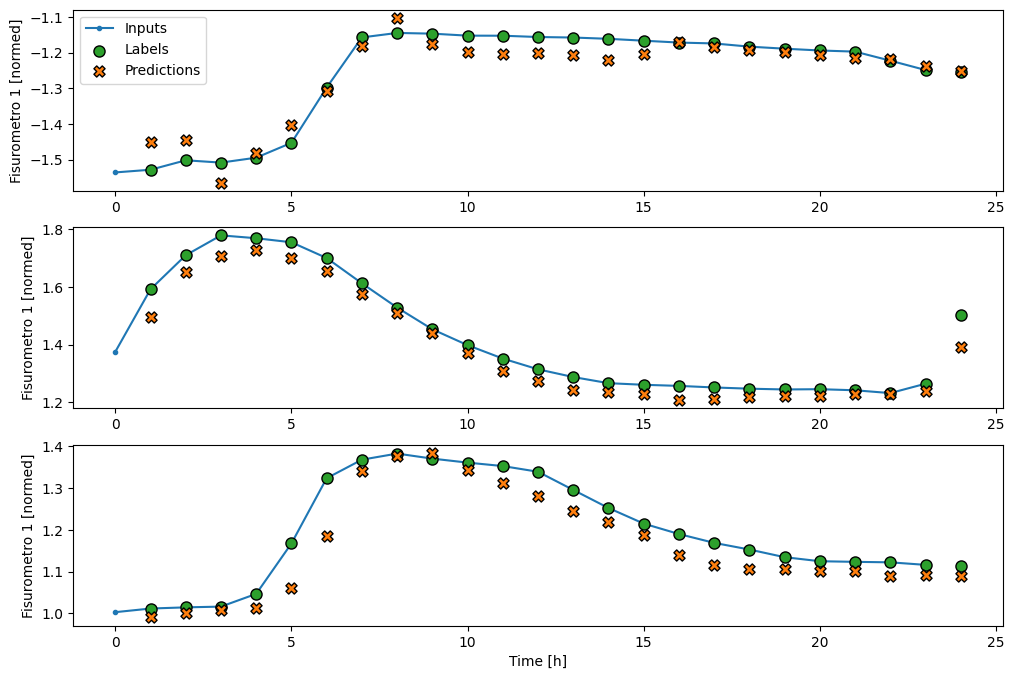

In [56]:
wide_window.plot(dense, plot_col=label_columns[0])

17/17 [==============================] - 1s 14ms/step


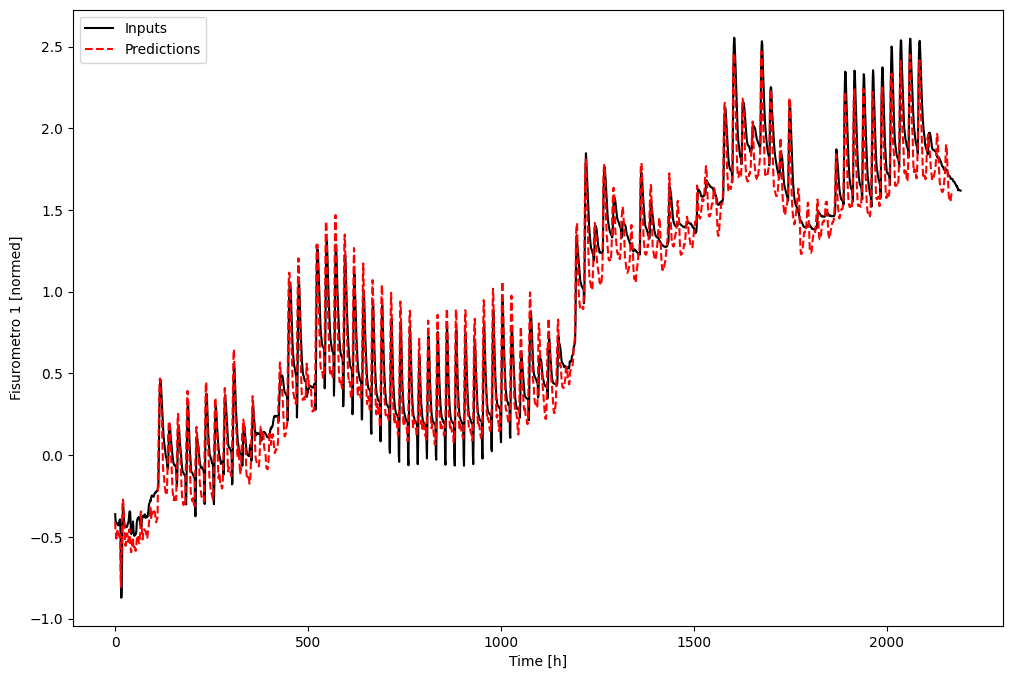

In [99]:
wide_window.plot_all(dense, plot_col=label_columns[0])

In [57]:
denseSGD = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit_SGD(denseSGD, single_step_window)

IPython.display.clear_output()
val_performance['A3_Dense_UnPaso_SGD'] = denseSGD.evaluate(single_step_window.val)
performance['A3_Dense_UnPaso_SGD'] = denseSGD.evaluate(single_step_window.test, verbose=0)

137/137 [==============================] - 1s 7ms/step - loss: 0.0043 - mae: 0.0737


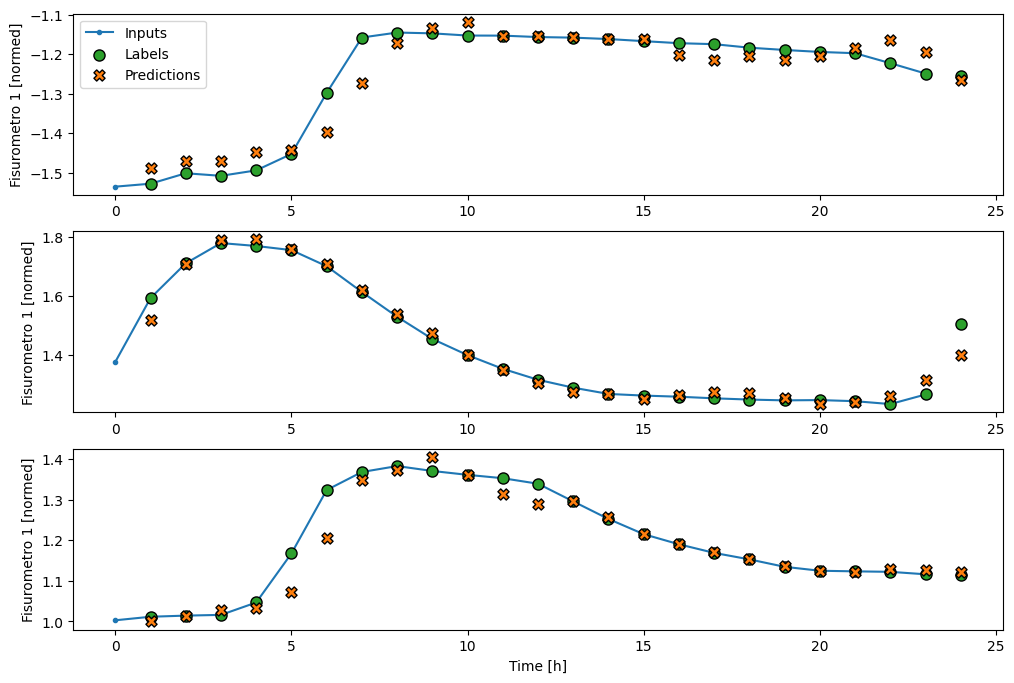

In [59]:
wide_window.plot(denseSGD, plot_col=label_columns[0])

## B. Análisis con Modelos de Multiples Pasos


Se empieza construyendo un modelo que predice el valor de una característica de análisis una hora en el futuro, basándose en multiples pasos temporales, de tal forma que el modelo tomará estos pasos temporales para producir una única salida.

Para lograr esto, se crea un `WindowGenerator` que producirá lotes de entradas de tres horas y etiquetas de una hora`(input, label)`, sin embargo, se establece un shift igual a uno, de esta manera se entrenará el algoritmo para predecir el valor de cada hora consecutiva, pero teniendo en consideración las tres horas anteriores:

In [60]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Fisurometro 1'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Fisurometro 1']

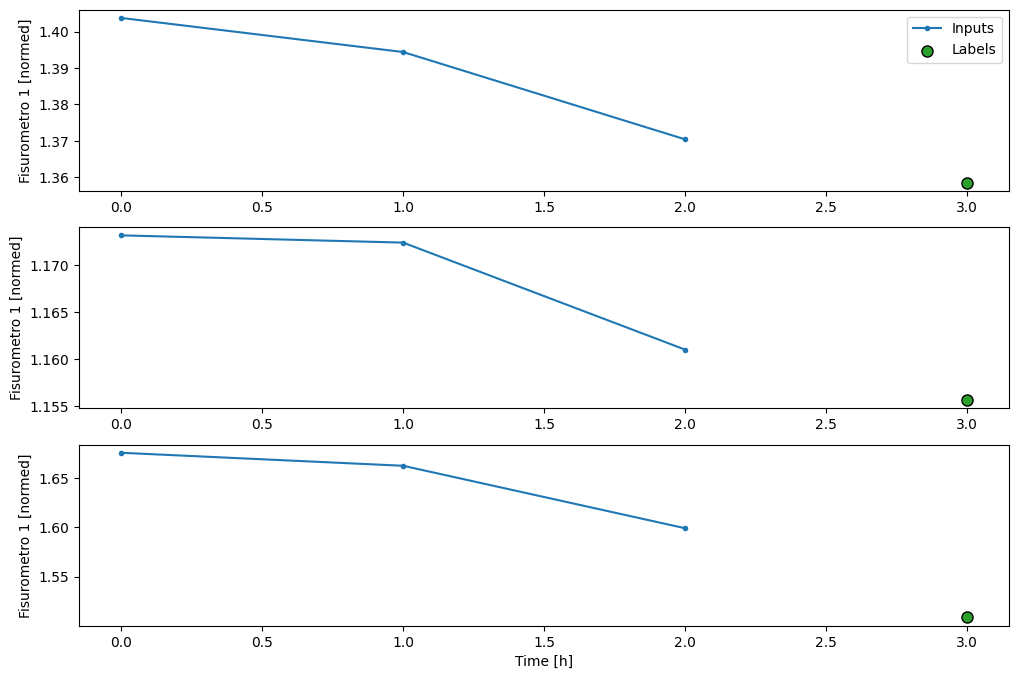

In [61]:
conv_window.plot(plot_col=label_columns[0])

## B1. Modelo Denso de Multiples pasos

Se entrena un modelo `denso` en una ventana de múltiples pasos de entrada añadiendo un `tf.keras.layers.Flatten` como primera capa del modelo, esta capa apila los valores de las diferentes caracteristicas (sensores) en un solo vector de longitud 3 horas por 18 parámetros en la base de datos:

In [62]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['B1_MultiStepDense_MAE'] = multi_step_dense.evaluate(conv_window.val)
performance['B1_Multi step dense_MAE'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

137/137 [==============================] - 1s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0712


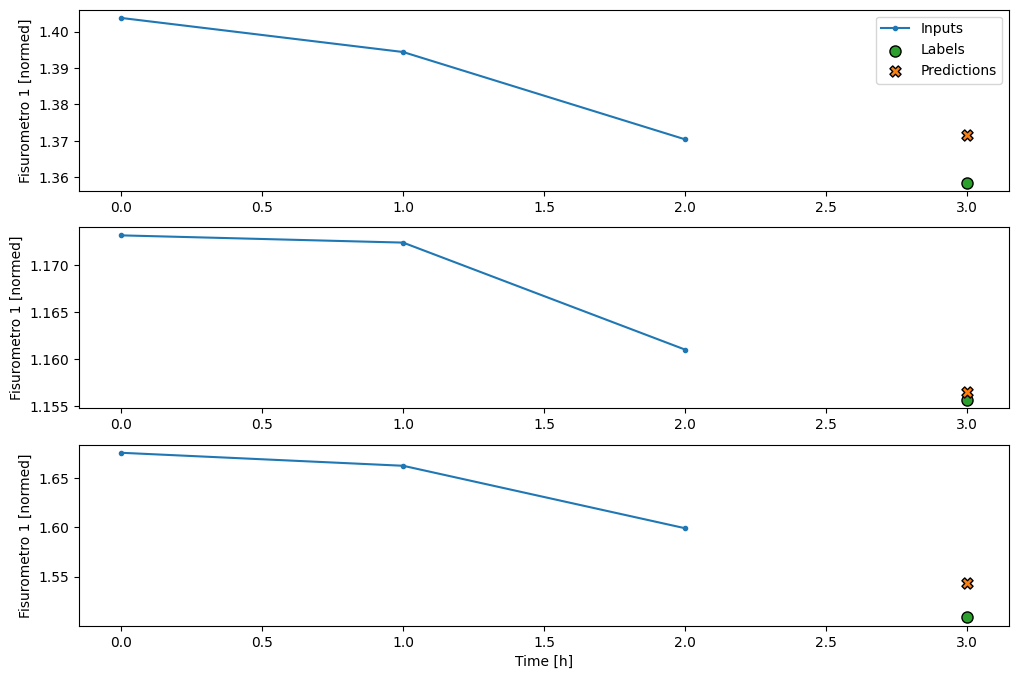

In [63]:
conv_window.plot(multi_step_dense, plot_col=label_columns[0])

18/18 [==============================] - 0s 13ms/step


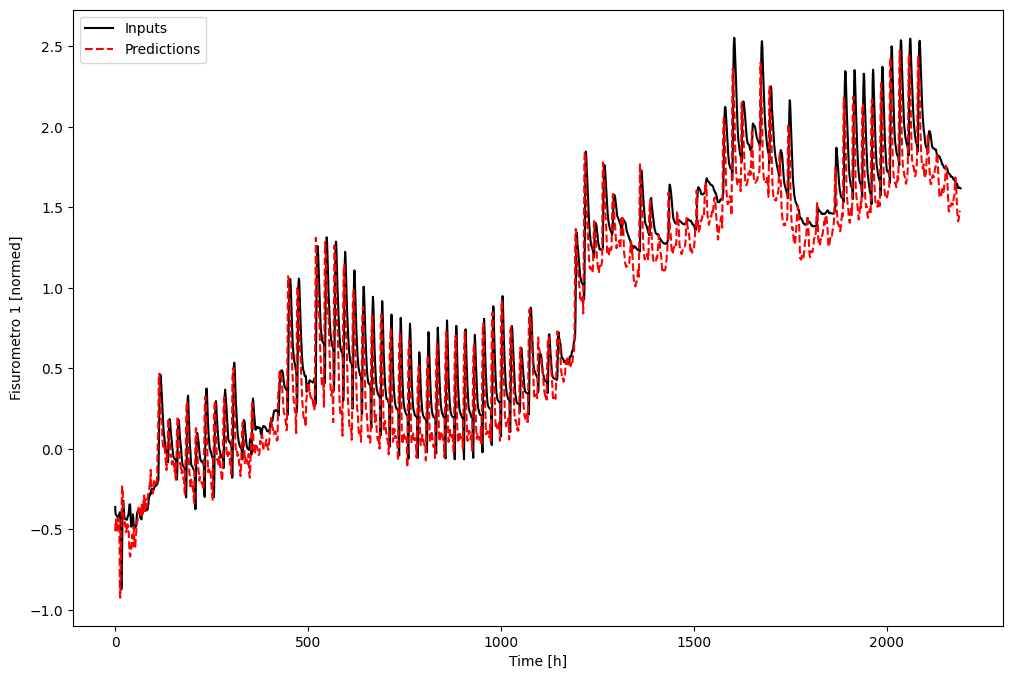

In [98]:
conv_window.plot_all(multi_step_dense, plot_col=label_columns[0])

In [64]:
multi_step_dense_SGD = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

history = compile_and_fit_SGD(multi_step_dense_SGD, conv_window)

IPython.display.clear_output()
val_performance['B1_MultiStepDense_SGD'] = multi_step_dense_SGD.evaluate(conv_window.val)
performance['B1_Multi step dense_SGD'] = multi_step_dense_SGD.evaluate(conv_window.test, verbose=0)

137/137 [==============================] - 1s 7ms/step - loss: 0.0040 - mae: 0.0709


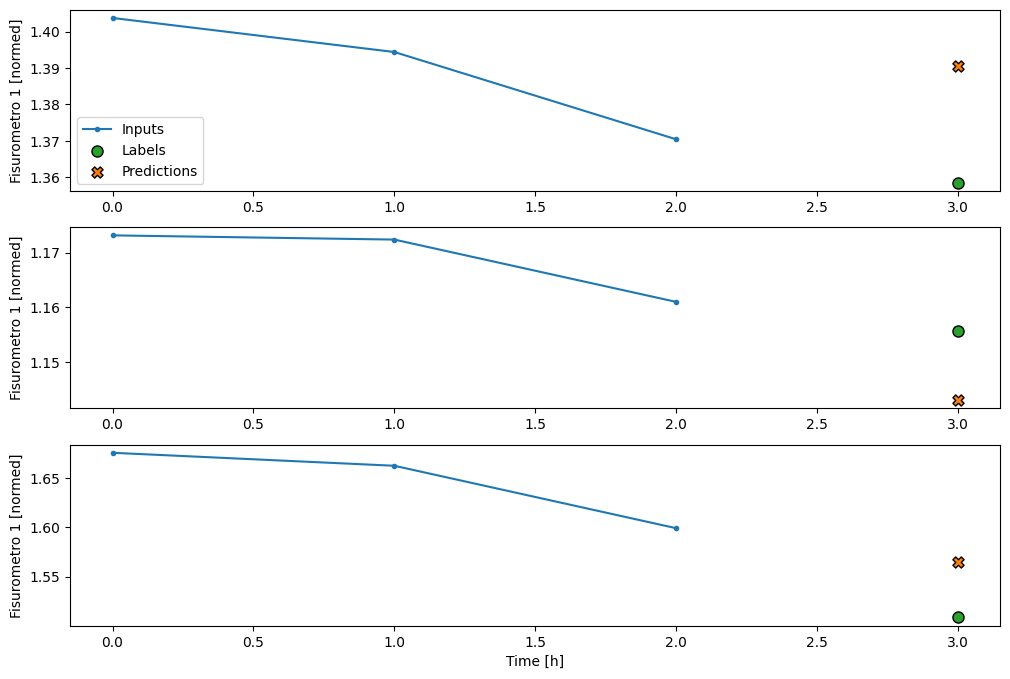

In [65]:
conv_window.plot(multi_step_dense_SGD, plot_col=label_columns[0])

18/18 [==============================] - 0s 20ms/step


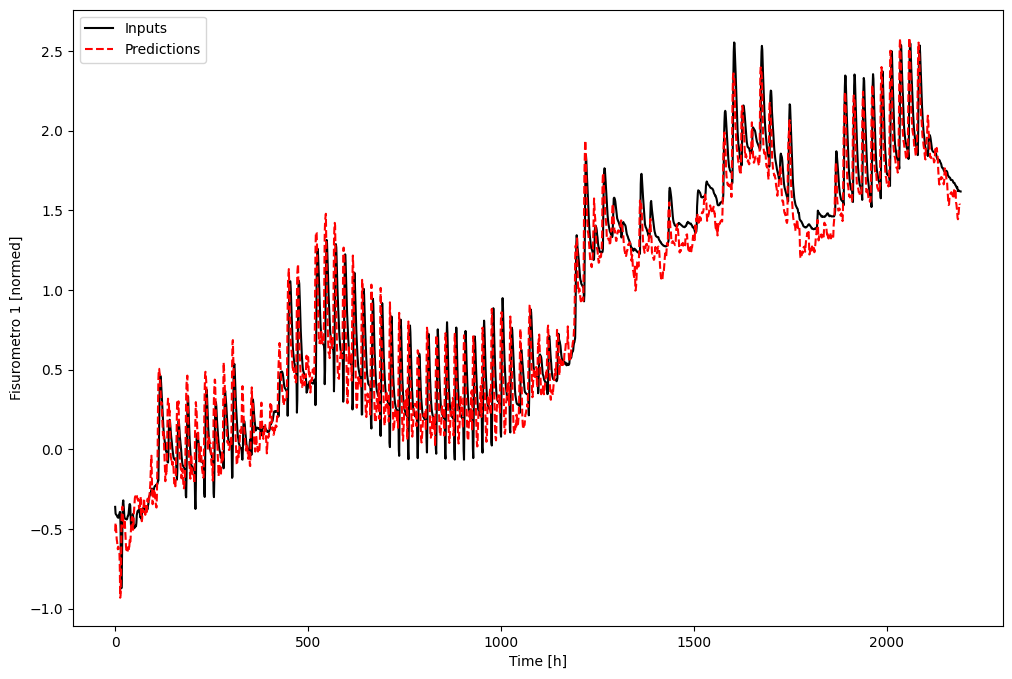

In [97]:
conv_window.plot_all(multi_step_dense_SGD, plot_col=label_columns[0])

### B2. Modelo de Red neuronal de convolución
 
Se plantea otro modelo usando capas de convolución (`tf.keras.layers.Conv1D`) las cuales toman múltiples pasos de tiempo como entrada para cada predicción. En este ejemplo se utiliza 32 filtros de convolución y algoritmos de activación `Relu` al ser un problema de predicción de valores. La ultima capa se mantiene para predecir una sola caracteristica el cual sera `Fisurometro 1`

In [66]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['B2_Conv_MAE'] = conv_model.evaluate(conv_window.val)
performance['B2_Conv_MAE'] = conv_model.evaluate(conv_window.test, verbose=0)

137/137 [==============================] - 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0505


In [67]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Fisurometro 1'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Fisurometro 1']

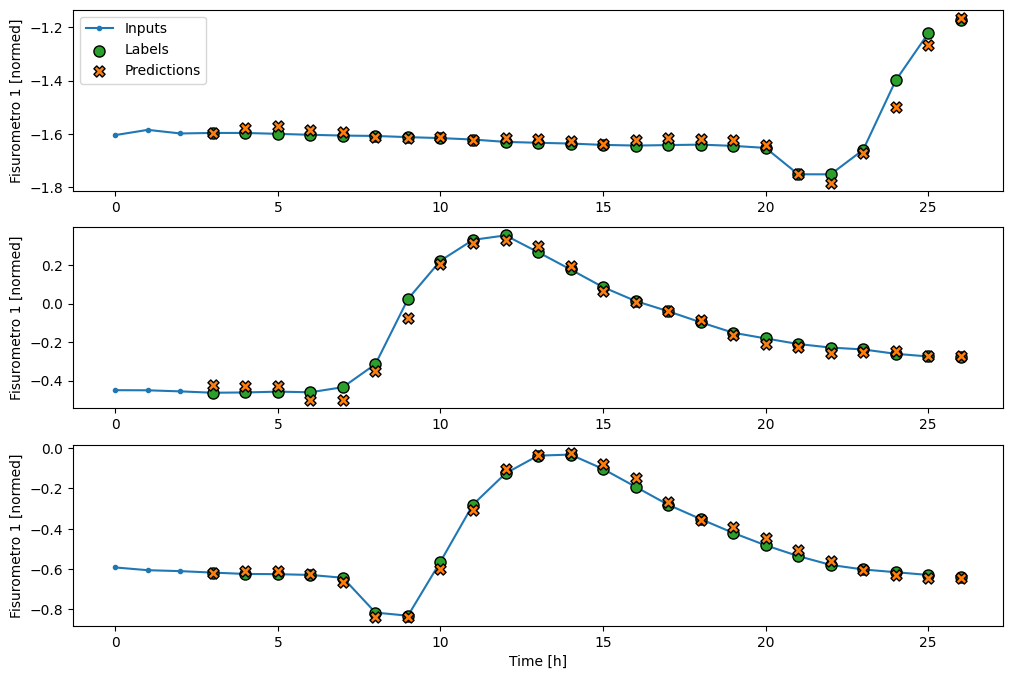

In [68]:
wide_conv_window.plot(conv_model, plot_col=label_columns[0])

17/17 [==============================] - 1s 18ms/step


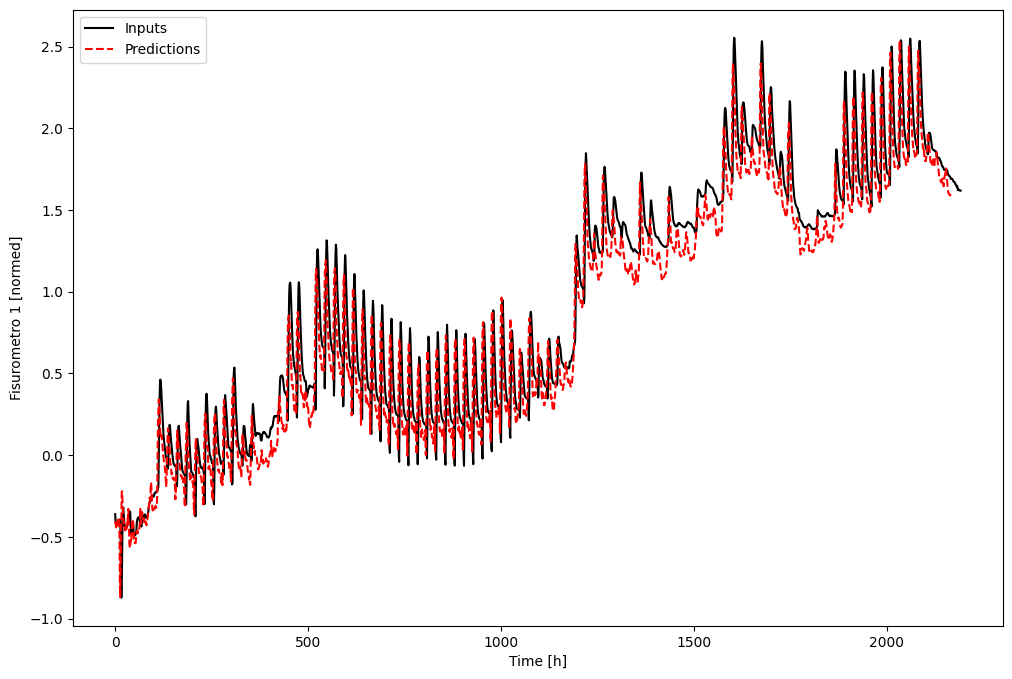

In [96]:
wide_conv_window.plot_all(conv_model, plot_col=label_columns[0])

In [69]:
conv_model_SGD = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

history = compile_and_fit_SGD(conv_model_SGD, conv_window)

IPython.display.clear_output()
val_performance['B2_Conv_SGD'] = conv_model_SGD.evaluate(conv_window.val)
performance['B2_Conv_SGD'] = conv_model_SGD.evaluate(conv_window.test, verbose=0)

137/137 [==============================] - 1s 8ms/step - loss: 0.0112 - mae: 0.1206


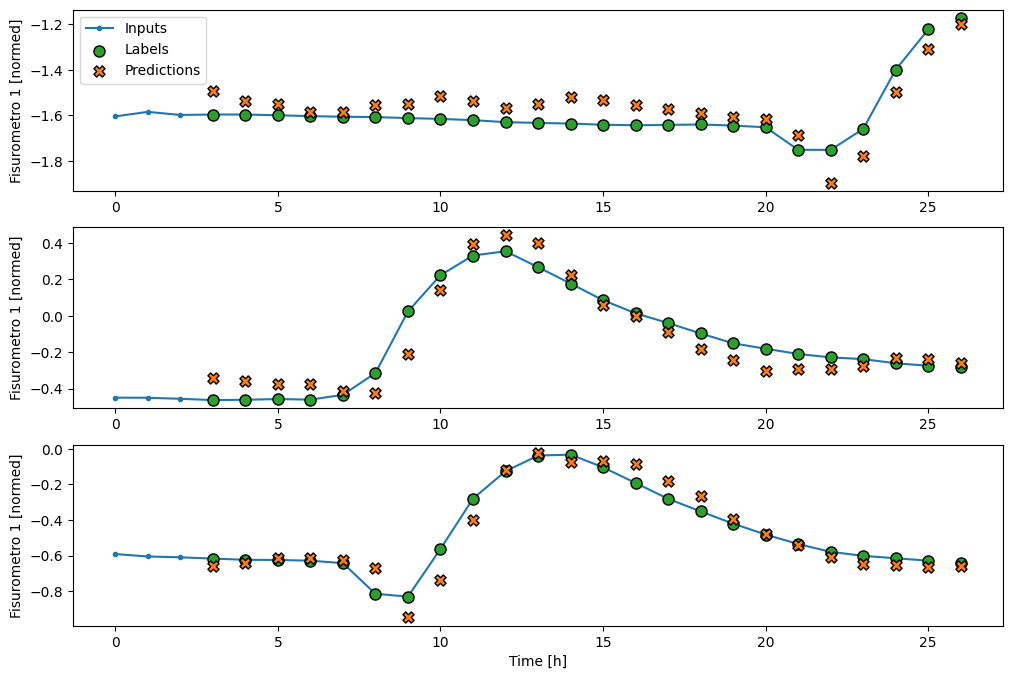

In [70]:
wide_conv_window.plot(conv_model_SGD, plot_col=label_columns[0])

17/17 [==============================] - 0s 19ms/step


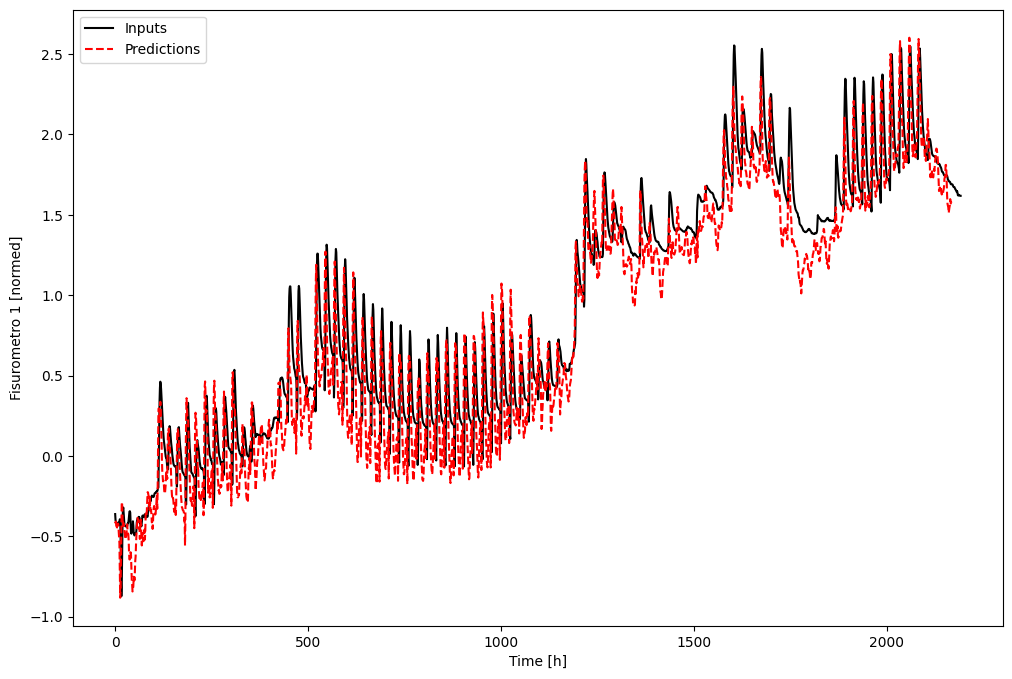

In [95]:
wide_window.plot_all(conv_model_SGD, plot_col=label_columns[0])

### B3. Red Neuronal Recurrente

Se propone una solución mediante la implementación de una red neuronal recurrente (RNN). El objetivo es aprovechar la memoria interna del pasado que almacenan estas redes, para predecir un paso de tiempo en el futuro. Existen diferentes tipos de capas que pueden emplearse para construir una RNN, en este trabajo se emplea una capa RNN llamada Memoria Larga a Corto Plazo (`tf.keras.layers.LSTM`).

Debido a que este tipo de red requiere saber la información del pasado para predecir datos en el futuro, se configura la red para que devuelva una salida para cada entrada de dato. Esto se logra configurando el argumento `return_sequences = True`. Al generar esta configuración, la LSTM genera una predicción después de cada paso de tiempo

Con `return_sequences=True`, el modelo puede entrenarse con 24 horas de datos cada vez, sin embargo, en el primer paso temporal, el modelo no tiene acceso a los pasos anteriores y, por lo tanto, no puede hacerlo mejor que los modelos `lineal` y `denso` mostrados anteriormente.

In [71]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [72]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['B3_LSTM_MAE'] = lstm_model.evaluate(wide_window.val)
performance['B3_LSTM_MAE'] = lstm_model.evaluate(wide_window.test, verbose=0)

137/137 [==============================] - 1s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0272


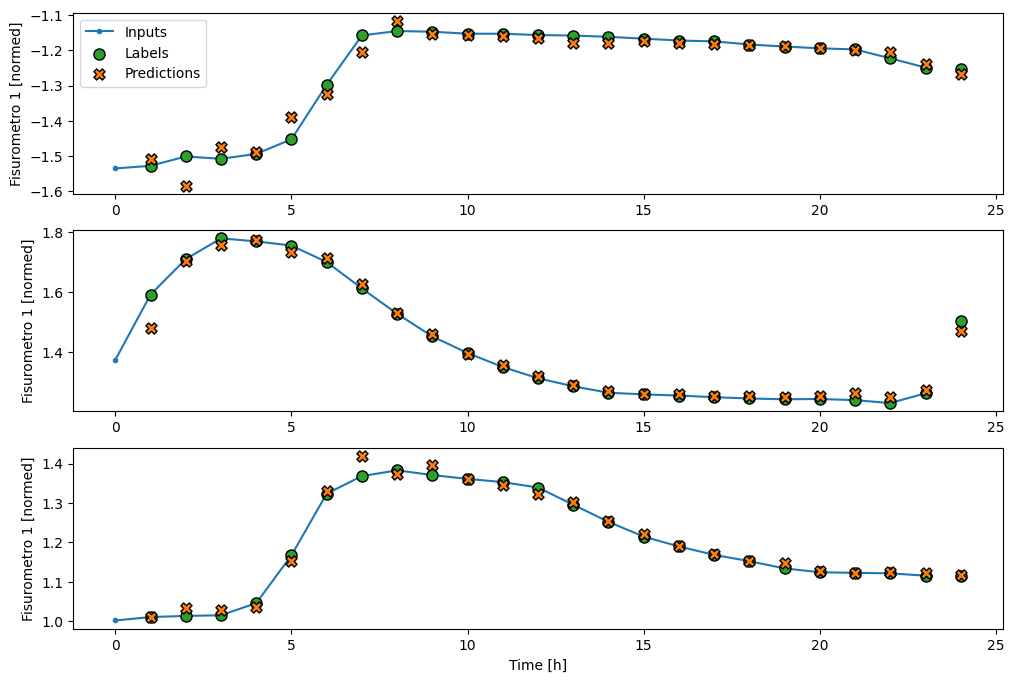

In [73]:
wide_window.plot(lstm_model, plot_col=label_columns[0])

17/17 [==============================] - 0s 22ms/step


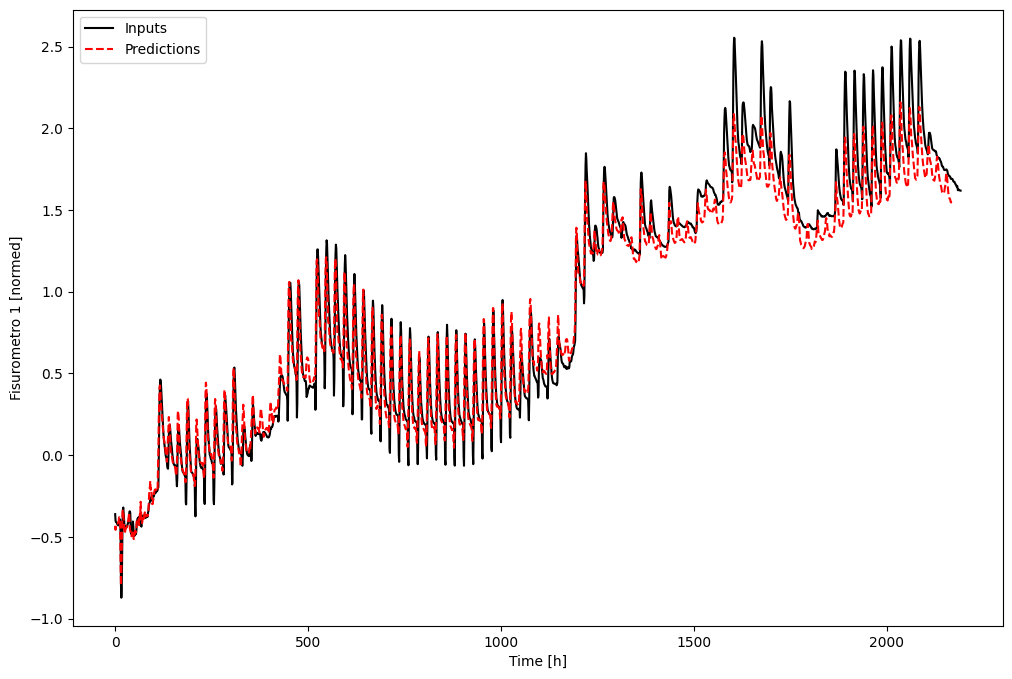

In [93]:
wide_window.plot_all(lstm_model, plot_col=label_columns[0])

In [74]:
lstm_model_SGD = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit_SGD(lstm_model_SGD, wide_window)

IPython.display.clear_output()
val_performance['B3_LSTM_SGD'] = lstm_model_SGD.evaluate(wide_window.val)
performance['B3_LSTM_SGD'] = lstm_model_SGD.evaluate(wide_window.test, verbose=0)

137/137 [==============================] - 2s 12ms/step - loss: 0.0032 - mae: 0.0638


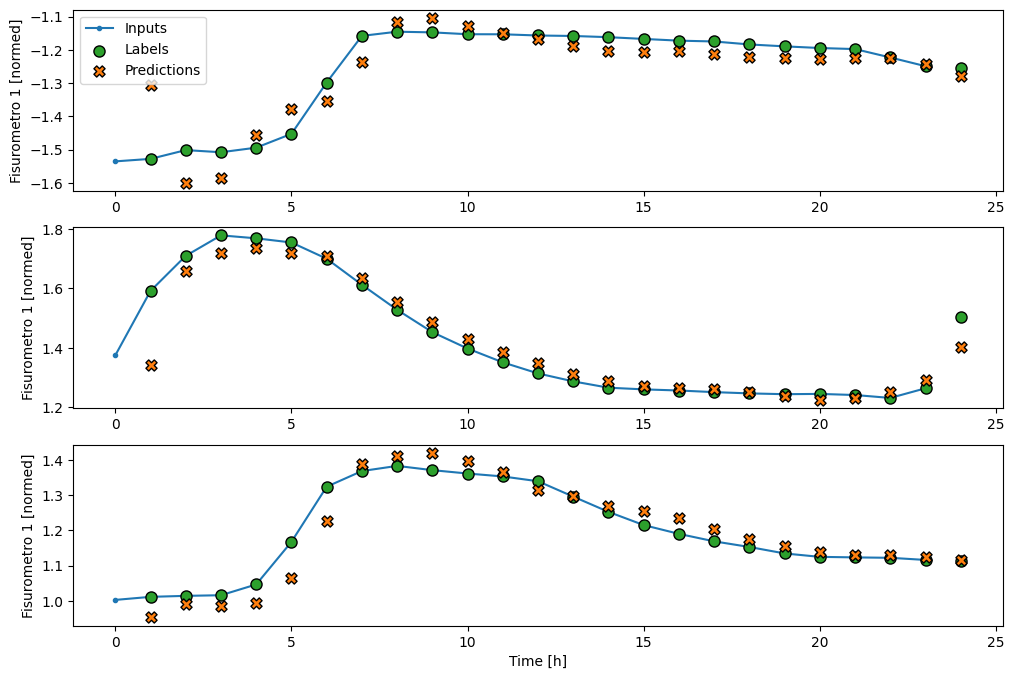

In [75]:
wide_window.plot(lstm_model_SGD, plot_col=label_columns[0])

17/17 [==============================] - 1s 25ms/step


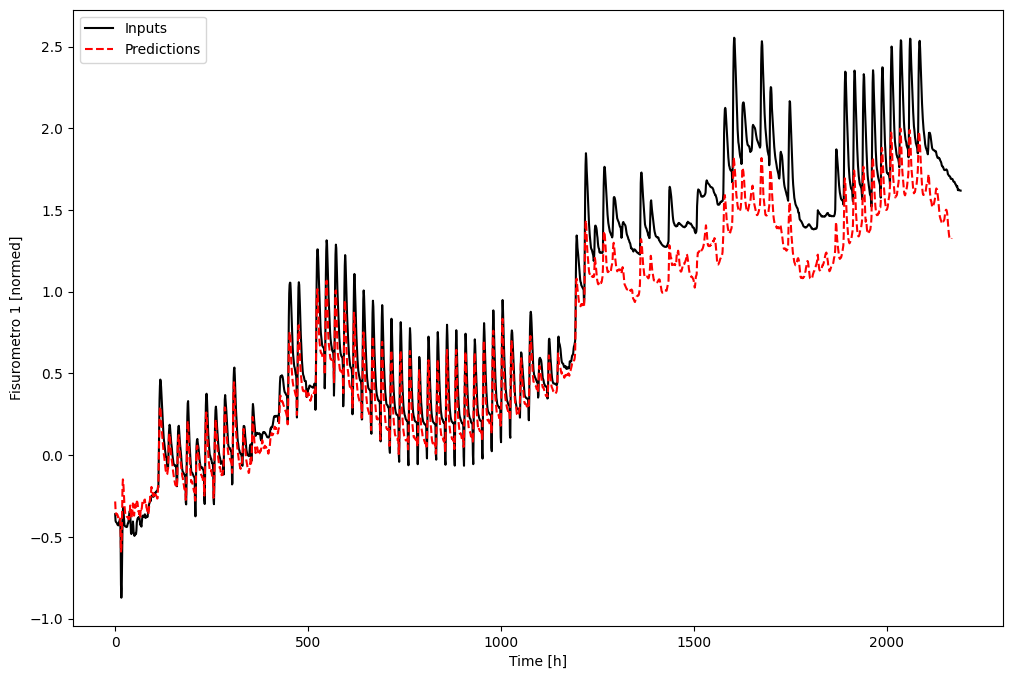

In [94]:
wide_window.plot_all(lstm_model_SGD, plot_col=label_columns[0])

### Rendimiento

Con este conjunto de datos, cada uno de los modelos suele obtener resultados ligeramente mejores que el anterior:

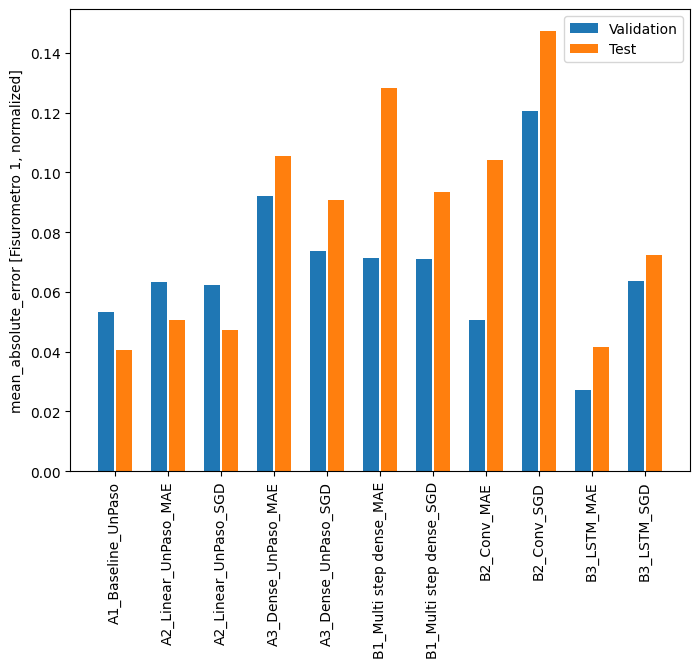

In [77]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Fisurometro 1, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=90)
_ = plt.legend()

In [78]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

A1_Baseline_UnPaso: 0.0405
A2_Linear_UnPaso_MAE: 0.0506
A2_Linear_UnPaso_SGD: 0.0472
A3_Dense_UnPaso_MAE: 0.1054
A3_Dense_UnPaso_SGD: 0.0907
B1_Multi step dense_MAE: 0.1281
B1_Multi step dense_SGD: 0.0933
B2_Conv_MAE : 0.1043
B2_Conv_SGD : 0.1473
B3_LSTM_MAE : 0.0414
B3_LSTM_SGD : 0.0723


In [91]:
def plot_all(self, model=None, plot_col=None):

    inputs = self.test_plot
#     inputs = self.test
    plot_col_index = self.column_indices[plot_col]
    
    if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
        label_col_index = plot_col_index
                
    Pred_List = np.empty(shape=(0,))
    input_list = []
    
    predictions = model.predict(inputs)
    
    serie = np.array(self.test_df, dtype=np.float32)
    serie = serie[:,plot_col_index]
    
    max_n = len(predictions)
    
    for n in range(max_n):

        if model is not None:
            
            Pred_List = np.append(Pred_List, predictions[n, :, label_col_index])

    predictions.squeeze()
    Pred_List = predictions[:,label_col_index]

    time = range(len(Pred_List))
            

    plt.figure(figsize=(12, 8))
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(serie, label='Inputs', color='black')
    plt.plot(time, Pred_List, linestyle='--', color='red', label='Predictions')
    plt.xlabel('Time [h]')
    plt.legend()

WindowGenerator.plot_all = plot_all


In [92]:
def make_dataset_plot(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.input_width,
          sequence_stride=1,
          shuffle=False)

    ds = ds.map(self.split_window_plot)
    return ds

WindowGenerator.make_dataset_plot = make_dataset_plot

In [86]:
def split_window_plot(self, features):
    inputs = features[:, self.input_slice, :]
    inputs.set_shape([None, self.input_width, None])
    return inputs

WindowGenerator.split_window_plot = split_window_plot

In [87]:
@property
def test_plot(self):
    return self.make_dataset_plot(self.test_df)

WindowGenerator.test_plot = test_plot


### Referencias

- Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".
- Chollet, F. (2021). Deep learning with Python. Simon and Schuster.
- Dean, J., & Monga‘TensorFlow, R. (2015). Large-Scale Machine Learning on Heterogeneous Distributed Systems’. TensorFlow. org.
- Tensorflow (2015). Time series forecasting, https://www.tensorflow.org/tutorials/structured_data/time_series

In [102]:
# Save your model in the SavedModel format
lstm_model.save('saved_model/my_model')

# Compress the directory using tar
! tar -czvf saved_model.tar.gz saved_model/

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


saved_model/
saved_model/my_model/
saved_model/my_model/assets/
saved_model/my_model/keras_metadata.pb
saved_model/my_model/saved_model.pb
saved_model/my_model/variables/
saved_model/my_model/variables/variables.data-00000-of-00001
saved_model/my_model/variables/variables.index
